In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
data_path = "telcom_data (2).xlsx - Sheet1.csv"
df = pd.read_csv(data_path)

In [4]:
field_desc_path = "Field Descriptions.xlsx - Sheet1.csv"
field_desc = pd.read_csv(field_desc_path)

In [5]:
print("Preview of dataset:")
display(df.head())

Preview of dataset:


Bearer Id          Start  Start ms            End  End ms  Dur. (ms)  \
0  1.311450e+19   4/4/19 12:01     770.0  4/25/19 14:35   662.0  1823652.0   
1  1.311450e+19   4/9/19 13:04     235.0   4/25/19 8:15   606.0  1365104.0   
2  1.311450e+19   4/9/19 17:42       1.0  4/25/19 11:58   652.0  1361762.0   
3  1.311450e+19   4/10/19 0:31     486.0   4/25/19 7:36   171.0  1321509.0   
4  1.311450e+19  4/12/19 20:10     565.0  4/25/19 10:40   954.0  1089009.0   

           IMSI  MSISDN/Number          IMEI Last Location Name  ...  \
0  2.082014e+14   3.366496e+10  3.552121e+13        9.16457E+15  ...   
1  2.082019e+14   3.368185e+10  3.579401e+13            L77566A  ...   
2  2.082003e+14   3.376063e+10  3.528151e+13            D42335A  ...   
3  2.082014e+14   3.375034e+10  3.535661e+13            T21824A  ...   
4  2.082014e+14   3.369980e+10  3.540701e+13            D88865A  ...   

   Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0          15854611.0           2501332.0           8198936.0   
1          20247395.0          19111729.0          18338413.0   
2          19725661.0          14699576.0          17587794.0   
3          21388122.0          15146643.0          13994646.0   
4          15259380.0          18962873.0          17124581.0   

   Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0           9656251.0        278082303.0         14344150.0       171744450.0   
1          17227132.0        608750074.0          1170709.0       526904238.0   
2           6163408.0        229584621.0           395630.0       410692588.0   
3           1097942.0        799538153.0         10849722.0       749039933.0   
4            415218.0        527707248.0          3529801.0       550709500.0   

   Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
0         8814393.0        36749741.0       308879636.0  
1        15055145.0        53800391.0       653384965.0  
2         4215763.0        27883638.0       279807335.0  
3        12797283.0        43324218.0       846028530.0  
4        13910322.0        38542814.0       569138589.0  

[5 rows x 55 columns]

Dataset Preview (head())
You saw the first 5 rows of your dataset.
This gave us an idea of what kind of information is stored (user ID, handset, data usage, apps like YouTube/Netflix, etc.).
Each row represents a user activity session (xDR record).

In [7]:
print("\nDataset Shape (rows, columns):", df.shape)


Dataset Shape (rows, columns): (150001, 55)


Dataset Shape (df.shape)

This shows the number of rows (records) and columns (features).

Example: If shape = (150,000, 30), that means 150,000 rows (user sessions) and 30 columns (different features).

Large datasets are normal in telecom since every internet or call activity is recorded.

In [9]:
print("\nColumns in dataset:")
print(df.columns.tolist())


Columns in dataset:
['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)

Column Names (df.columns)
This lists all the available features.
Based on the project, some important columns are:
MSISDN/Number → Unique user ID (customer).
Handset Type & Manufacturer → User device details.
DL (Download) & UL (Upload) data → Measures data consumption.
TCP, RTT, Throughput → Network performance metrics.
Application data (YouTube, Netflix, Social Media, Gaming, etc.) → How users spend data.

In [11]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL 

Missing Values (df.isnull().sum())
This shows how many empty or missing entries are present in each column.
Telecom datasets usually have missing values because not every user uses all apps or devices.
For example:
A user who never watches Netflix will have NaN in Netflix data.
If handset type is missing, we’ll handle it later (replace with “Unknown” or most common type).

In [13]:
print("\nField Descriptions Preview:")
display(field_desc.head())


Field Descriptions Preview:


Fields                                        Description
0  bearer id                             xDr session identifier
1  Dur. (ms)                  Total Duration of the xDR (in ms)
2      Start      Start time of the xDR (first frame timestamp)
3   Start ms  Milliseconds offset of start time for the xDR ...
4        End         End time of the xDR (last frame timestamp)

Field Descriptions Preview
This file explains the meaning of each column.
Example:
Dur. (ms) → session duration in milliseconds.
TCP retransmission → measure of network quality.
Handset Type → mobile model.
This is very helpful because sometimes column names are technical.

In [15]:
top_10_handsets = (
    df['Handset Type']
    .value_counts()
    .head(10)
)
print("Top 10 Handsets:")
display(top_10_handsets)

Top 10 Handsets:


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

Insight:

iPhones dominate the top 10 list.

Samsung Galaxy series is also very popular.

Huawei has significant representation (P30, Mate 20).

One budget phone (Oppo A5) appears, meaning some price-sensitive users exist.

In [17]:
top_3_manufacturers = (
    df['Handset Manufacturer']
    .value_counts()
    .head(3)
)
print("\nTop 3 Handset Manufacturers:")
display(top_3_manufacturers)


Top 3 Handset Manufacturers:


Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

Insight:
Apple leads the market (premium users).
Samsung is close behind (wide mix of premium + mid-range).
Huawei holds third place (budget + mid-range).

In [19]:
top_5_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_5 = (
        df[df['Handset Manufacturer'] == manufacturer]['Handset Type']
        .value_counts()
        .head(5)
    )
    top_5_per_manufacturer[manufacturer] = top_5

print("\nTop 5 Handsets per Top 3 Manufacturers:")
for manufacturer, handsets in top_5_per_manufacturer.items():
    print(f"\n{manufacturer}:")
    display(handsets)


Top 5 Handsets per Top 3 Manufacturers:

Apple:


Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64


Samsung:


Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64


Huawei:


Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64

Top 5 Handsets per Manufacturer
Apple → iPhone 11, iPhone X, iPhone 7, iPhone 12, iPhone 8
Samsung → Galaxy S9, Galaxy S10, Galaxy Note 9, Galaxy S8, Galaxy A50
Huawei → P30, Mate 20, P20 Lite, Y9, Nova 3i

Insight:
Apple dominance is spread across premium iPhones (customers likely to spend on high data plans).
Samsung users are mixed: some use premium (S-series, Note-series), others use mid-range (A-series).
Huawei handsets lean more towards mid/low range, meaning these users may prefer affordable prepaid bundles.

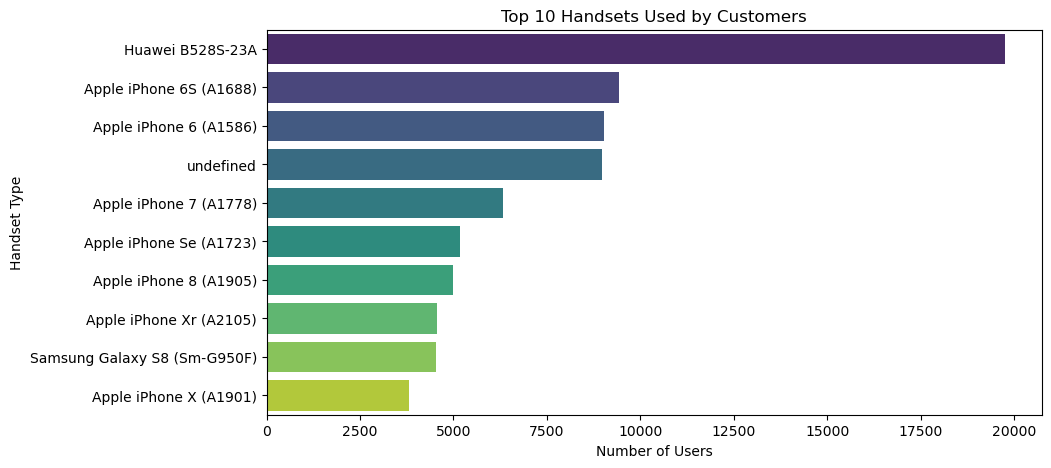

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette="viridis")
plt.title("Top 10 Handsets Used by Customers")
plt.xlabel("Number of Users")
plt.ylabel("Handset Type")
plt.show()

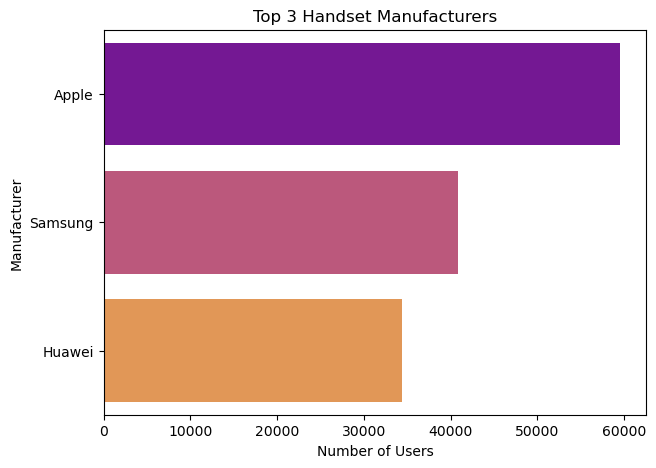

In [22]:
plt.figure(figsize=(7,5))
sns.barplot(x=top_3_manufacturers.values, y=top_3_manufacturers.index, palette="plasma")
plt.title("Top 3 Handset Manufacturers")
plt.xlabel("Number of Users")
plt.ylabel("Manufacturer")
plt.show()

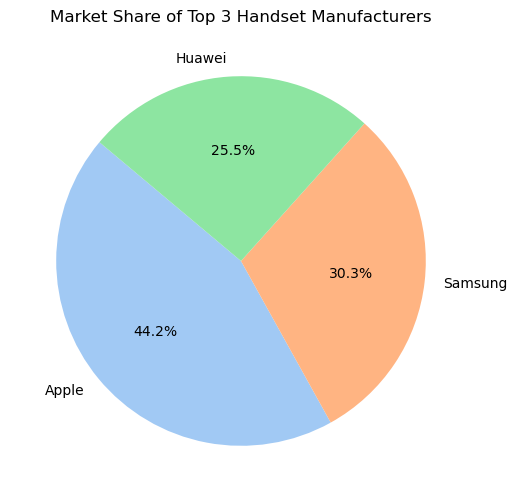

In [23]:
plt.figure(figsize=(6,6))
plt.pie(
    top_3_manufacturers.values, 
    labels=top_3_manufacturers.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("pastel")
)
plt.title("Market Share of Top 3 Handset Manufacturers")
plt.show()

Insights for Marketing

If Apple dominates → Focus on premium bundles (music, video streaming, unlimited plans).

If Samsung is strong → Push family packages & mid-range offers (Samsung serves a wide range of users).

If Huawei or budget brands appear → Offer cheaper prepaid data packs for students and low-income users.

In [25]:
app_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Add total columns for each app
for app in ["Social Media", "Google", "Email", "Youtube", "Netflix", "Gaming", "Other"]:
    df[f"{app} Total (Bytes)"] = df[f"{app} DL (Bytes)"] + df[f"{app} UL (Bytes)"]

# Now aggregate per user (MSISDN/Number)
user_behavior = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',  # total session duration
    'Bearer Id': 'count',  # number of sessions (assuming Bearer Id = session identifier)
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media Total (Bytes)': 'sum',
    'Google Total (Bytes)': 'sum',
    'Email Total (Bytes)': 'sum',
    'Youtube Total (Bytes)': 'sum',
    'Netflix Total (Bytes)': 'sum',
    'Gaming Total (Bytes)': 'sum',
    'Other Total (Bytes)': 'sum'
}).reset_index()

# Rename columns for clarity
user_behavior.rename(columns={
    'Dur. (ms)': 'Total Session Duration',
    'Bearer Id': 'Number of Sessions',
    'Total DL (Bytes)': 'Total Download (Bytes)',
    'Total UL (Bytes)': 'Total Upload (Bytes)'
}, inplace=True)

# Add total traffic (DL + UL)
user_behavior['Total Traffic (Bytes)'] = (
    user_behavior['Total Download (Bytes)'] + user_behavior['Total Upload (Bytes)']
)

print("Preview of User Behavior Aggregated Data:")
display(user_behavior.head())

Preview of User Behavior Aggregated Data:


MSISDN/Number  Total Session Duration  Number of Sessions  \
0   3.360100e+10                116720.0                   1   
1   3.360100e+10                181230.0                   1   
2   3.360100e+10                134969.0                   1   
3   3.360101e+10                 49878.0                   1   
4   3.360101e+10                 37104.0                   2   

   Total Download (Bytes)  Total Upload (Bytes)  Social Media Total (Bytes)  \
0            8.426375e+08            36053108.0                   2232135.0   
1            1.207552e+08            36104459.0                   2660565.0   
2            5.566597e+08            39306820.0                   3195623.0   
3            4.019932e+08            20327526.0                    280294.0   
4            1.363130e+09            94280527.0                   2912542.0   

   Google Total (Bytes)  Email Total (Bytes)  Youtube Total (Bytes)  \
0             4389005.0            1331362.0             21624548.0   
1             5334863.0            3307781.0             12432223.0   
2             3443126.0            3205380.0             21333570.0   
3             9678493.0            2284670.0              6977321.0   
4            18499616.0            3305469.0             41533002.0   

   Netflix Total (Bytes)  Gaming Total (Bytes)  Other Total (Bytes)  \
0             27180981.0          8.124587e+08          386570872.0   
1             11221763.0          1.197501e+08          281710071.0   
2             19353900.0          5.388277e+08          501693672.0   
3              1942092.0          3.911261e+08           35279702.0   
4             49201724.0          1.314798e+09          804804484.0   

   Total Traffic (Bytes)  
0           8.786906e+08  
1           1.568596e+08  
2           5.959665e+08  
3           4.223207e+08  
4           1.457411e+09

In [26]:
#Check missing values
print("Missing values before cleaning:")
print(user_behavior.isnull().sum())

# Replace missing values with column mean
user_behavior.fillna(user_behavior.mean(), inplace=True)

print("\nMissing values after cleaning:")
print(user_behavior.isnull().sum())

#Handling outliers
# We'll use the IQR method (Interquartile Range) to detect and replace outliers with column mean

def treat_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with mean of the column
    mean_value = series.mean()
    return series.apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

# Apply outlier treatment to all numeric columns except user ID
numeric_cols = user_behavior.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    user_behavior[col] = treat_outliers(user_behavior[col])

print("\nData cleaning completed. Preview of cleaned dataset:")
display(user_behavior.head())

Missing values before cleaning:
MSISDN/Number                 0
Total Session Duration        0
Number of Sessions            0
Total Download (Bytes)        0
Total Upload (Bytes)          0
Social Media Total (Bytes)    0
Google Total (Bytes)          0
Email Total (Bytes)           0
Youtube Total (Bytes)         0
Netflix Total (Bytes)         0
Gaming Total (Bytes)          0
Other Total (Bytes)           0
Total Traffic (Bytes)         0
dtype: int64

Missing values after cleaning:
MSISDN/Number                 0
Total Session Duration        0
Number of Sessions            0
Total Download (Bytes)        0
Total Upload (Bytes)          0
Social Media Total (Bytes)    0
Google Total (Bytes)          0
Email Total (Bytes)           0
Youtube Total (Bytes)         0
Netflix Total (Bytes)         0
Gaming Total (Bytes)          0
Other Total (Bytes)           0
Total Traffic (Bytes)         0
dtype: int64

Data cleaning completed. Preview of cleaned dataset:


MSISDN/Number  Total Session Duration  Number of Sessions  \
0   4.511474e+10                116720.0                 1.0   
1   4.511474e+10                181230.0                 1.0   
2   4.511474e+10                134969.0                 1.0   
3   4.511474e+10                 49878.0                 1.0   
4   4.511474e+10                 37104.0                 2.0   

   Total Download (Bytes)  Total Upload (Bytes)  Social Media Total (Bytes)  \
0            8.426375e+08            36053108.0                   2232135.0   
1            1.207552e+08            36104459.0                   2660565.0   
2            5.566597e+08            39306820.0                   3195623.0   
3            4.019932e+08            20327526.0                    280294.0   
4            1.363130e+09            94280527.0                   2912542.0   

   Google Total (Bytes)  Email Total (Bytes)  Youtube Total (Bytes)  \
0             4389005.0            1331362.0             21624548.0   
1             5334863.0            3307781.0             12432223.0   
2             3443126.0            3205380.0             21333570.0   
3             9678493.0            2284670.0              6977321.0   
4            18499616.0            3305469.0             41533002.0   

   Netflix Total (Bytes)  Gaming Total (Bytes)  Other Total (Bytes)  \
0             27180981.0          8.124587e+08          386570872.0   
1             11221763.0          1.197501e+08          281710071.0   
2             19353900.0          5.388277e+08          501693672.0   
3              1942092.0          3.911261e+08           35279702.0   
4             49201724.0          1.314798e+09          804804484.0   

   Total Traffic (Bytes)  
0           8.786906e+08  
1           1.568596e+08  
2           5.959665e+08  
3           4.223207e+08  
4           1.457411e+09

Before cleaning → you may see missing values in columns like Netflix Total (Bytes) or Gaming Total (Bytes) (because not everyone uses those apps).
After cleaning → all NaN values are replaced with averages, so no missing data remains.
Outliers (extremely high data usage) are replaced with averages → this prevents one user from distorting graphs & statistics.

Example:
A student might use 200MB on Netflix (normal).
A heavy user might use 50GB on Netflix (outlier).
Instead of letting that one extreme user distort the averages, we replace their value with the mean Netflix usage.

In [28]:
#Descriptive Statistics

# Summary statistics for numeric columns
basic_stats = user_behavior.describe().T  # Transpose for readability

# Add extra columns for better insights
basic_stats['median'] = user_behavior.median()
basic_stats['null_count'] = user_behavior.isnull().sum()

print("Basic Metrics for User Behavior Dataset:")
display(basic_stats)

Basic Metrics for User Behavior Dataset:


count          mean           std  \
MSISDN/Number               106856.0  3.547481e+10  4.185737e+09   
Total Session Duration      106856.0  1.167756e+05  6.822270e+04   
Number of Sessions          106856.0  1.291390e+00  5.377240e-01   
Total Download (Bytes)      106856.0  5.705889e+08  3.272566e+08   
Total Upload (Bytes)        106856.0  5.049189e+07  2.005265e+07   
Social Media Total (Bytes)  106856.0  2.306857e+06  1.384353e+06   
Google Total (Bytes)        106856.0  9.676310e+06  4.900680e+06   
Email Total (Bytes)         106856.0  2.803581e+06  1.463577e+06   
Youtube Total (Bytes)       106856.0  2.791344e+07  1.324452e+07   
Netflix Total (Bytes)       106856.0  2.792465e+07  1.334509e+07   
Gaming Total (Bytes)        106856.0  5.419225e+08  3.234863e+08   
Other Total (Bytes)         106856.0  5.404096e+08  3.237750e+08   
Total Traffic (Bytes)       106856.0  6.184068e+08  3.329777e+08   

                                     min           25%           50%  \
MSISDN/Number               3.360204e+10  3.365097e+10  3.366375e+10   
Total Session Duration      7.142000e+03  7.130800e+04  1.027400e+05   
Number of Sessions          0.000000e+00  1.000000e+00  1.000000e+00   
Total Download (Bytes)      8.827082e+06  3.148271e+08  5.703677e+08   
Total Upload (Bytes)        2.866892e+06  3.639547e+07  4.679387e+07   
Social Media Total (Bytes)  1.563000e+03  1.211282e+06  2.303756e+06   
Google Total (Bytes)        4.033000e+04  5.942636e+06  9.586153e+06   
Email Total (Bytes)         1.817600e+04  1.674481e+06  2.799824e+06   
Youtube Total (Bytes)       7.890300e+04  1.863109e+07  2.680038e+07   
Netflix Total (Bytes)       1.845690e+05  1.855597e+07  2.671889e+07   
Gaming Total (Bytes)        3.063580e+05  2.880631e+08  5.423492e+08   
Other Total (Bytes)         1.490450e+05  2.855599e+08  5.398323e+08   
Total Traffic (Bytes)       3.324901e+07  3.585499e+08  6.179231e+08   

                                     75%           max        median  \
MSISDN/Number               3.368427e+10  4.511474e+10  3.366375e+10   
Total Session Duration      1.555420e+05  3.249910e+05  1.027400e+05   
Number of Sessions          1.389777e+00  3.000000e+00  1.000000e+00   
Total Download (Bytes)      7.662271e+08  1.546147e+09  5.703677e+08   
Total Upload (Bytes)        5.730942e+07  1.097364e+08  4.679387e+07   
Social Media Total (Bytes)  3.153077e+06  6.451407e+06  2.303756e+06   
Google Total (Bytes)        1.224316e+07  2.412220e+07  9.586153e+06   
Email Total (Bytes)         3.611720e+06  7.105100e+06  2.799824e+06   
Youtube Total (Bytes)       3.454934e+07  6.686420e+07  2.680038e+07   
Netflix Total (Bytes)       3.457207e+07  6.710397e+07  2.671889e+07   
Gaming Total (Bytes)        7.393844e+08  1.511139e+09  5.423492e+08   
Other Total (Bytes)         7.372069e+08  1.509955e+09  5.398323e+08   
Total Traffic (Bytes)       8.106536e+08  1.605749e+09  6.179231e+08   

                            null_count  
MSISDN/Number                        0  
Total Session Duration               0  
Number of Sessions                   0  
Total Download (Bytes)               0  
Total Upload (Bytes)                 0  
Social Media Total (Bytes)           0  
Google Total (Bytes)                 0  
Email Total (Bytes)                  0  
Youtube Total (Bytes)                0  
Netflix Total (Bytes)                0  
Gaming Total (Bytes)                 0  
Other Total (Bytes)                  0  
Total Traffic (Bytes)                0

THIS CODES GIVES US :
1. count → how many users we have in the dataset
2. mean → the average usage across all users
3. std (standard deviation) → how spread out the data is (high std = very different usage patterns)
4. min & max → lowest and highest usage (helps check if extreme outliers remain)
5. 25%, 50%, 75% → quartiles (middle points of the data)
6. median → the true middle value (less affected by outliers than mean)
7. null_count → confirms if any missing values are left

### Exploratory Data Analysis

### UNIVARIATE ANALYSIS

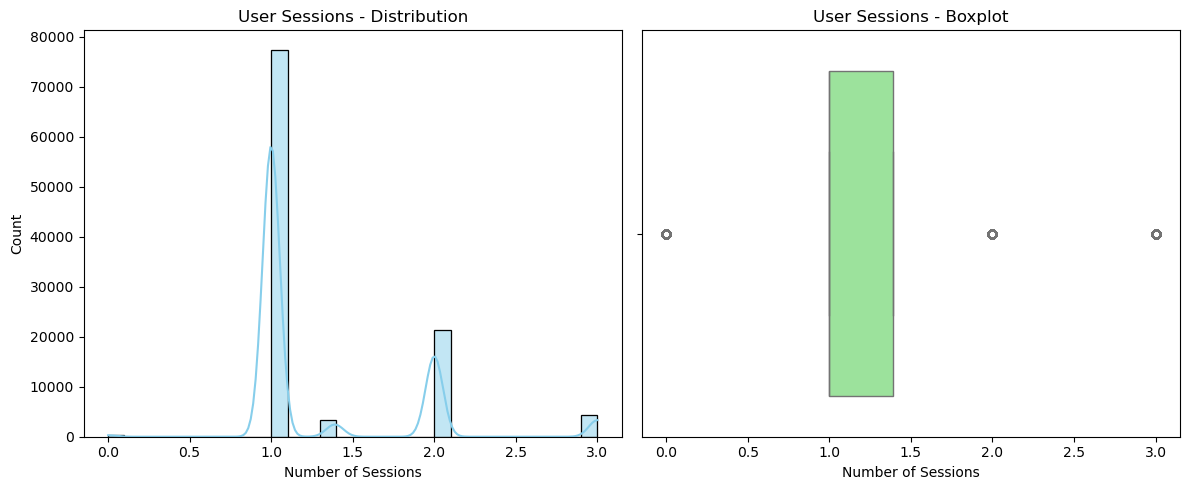

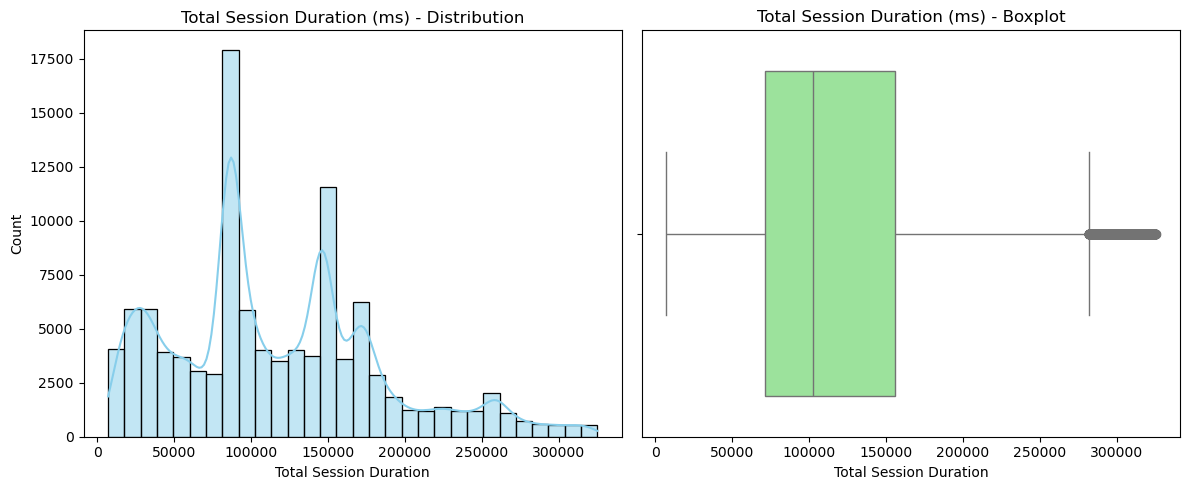

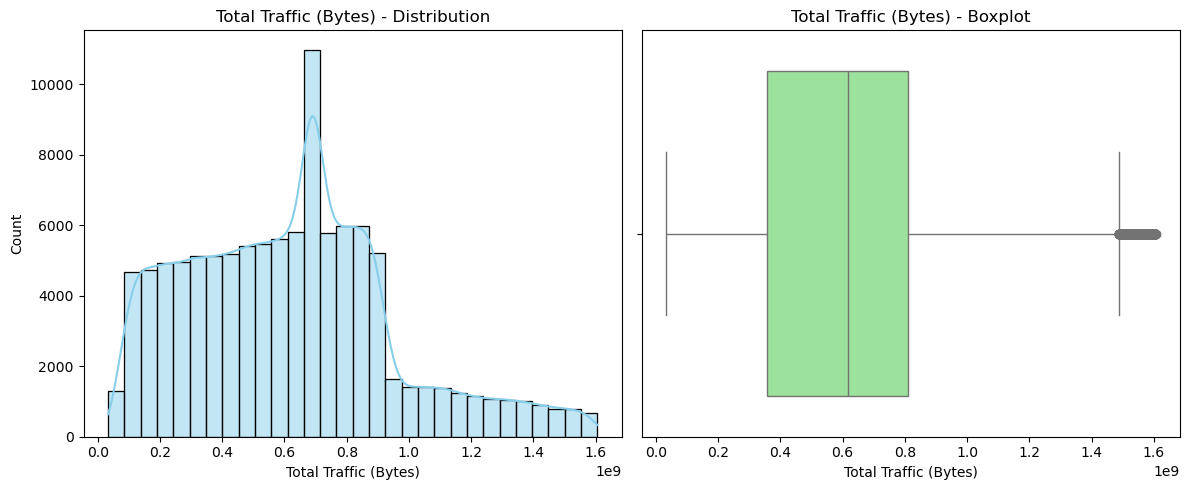

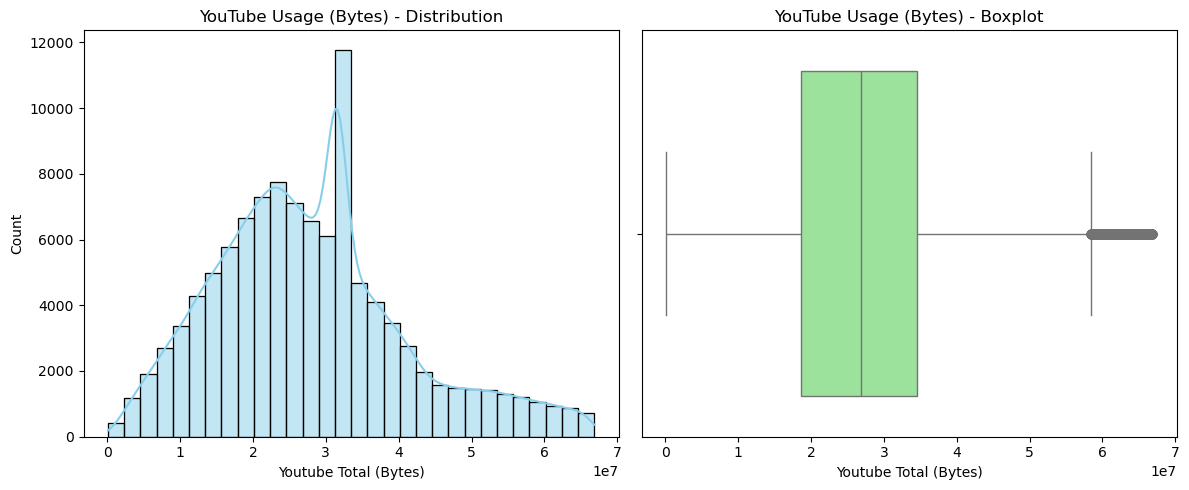

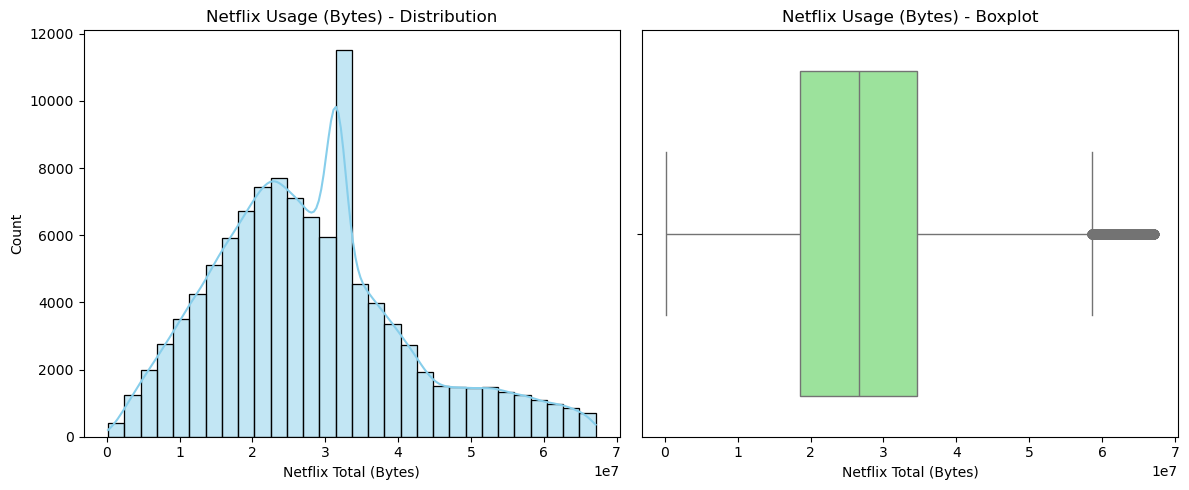

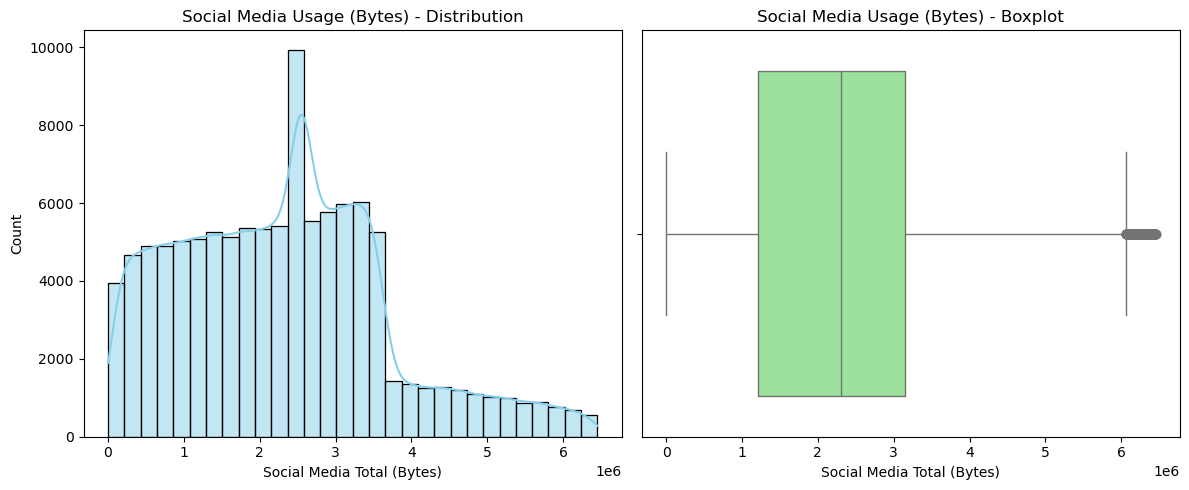

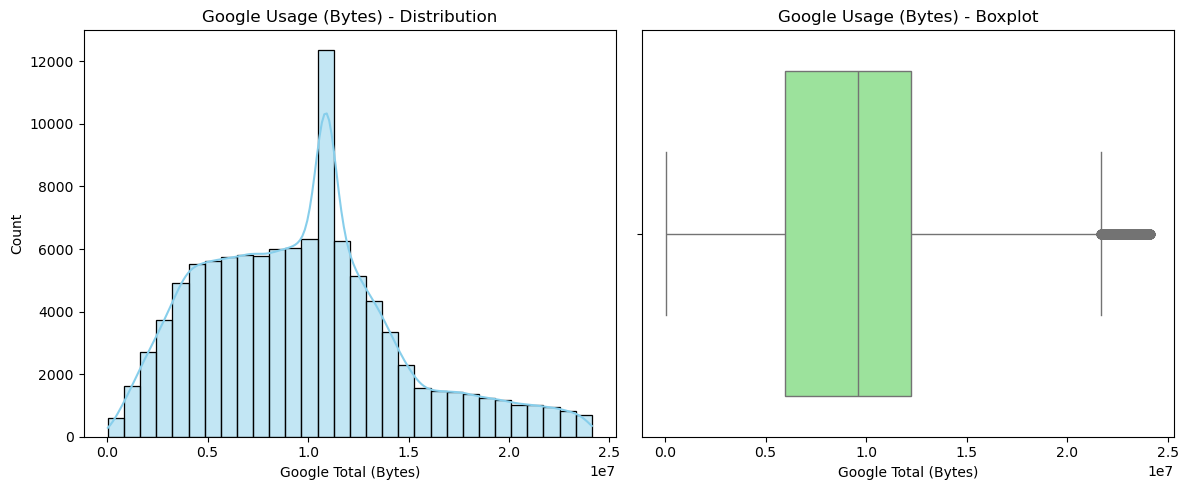

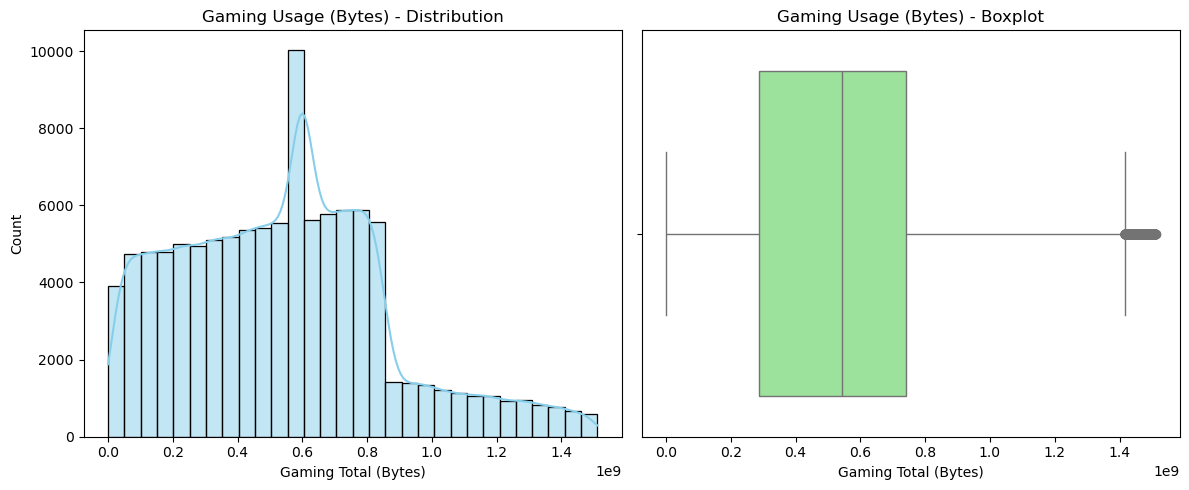

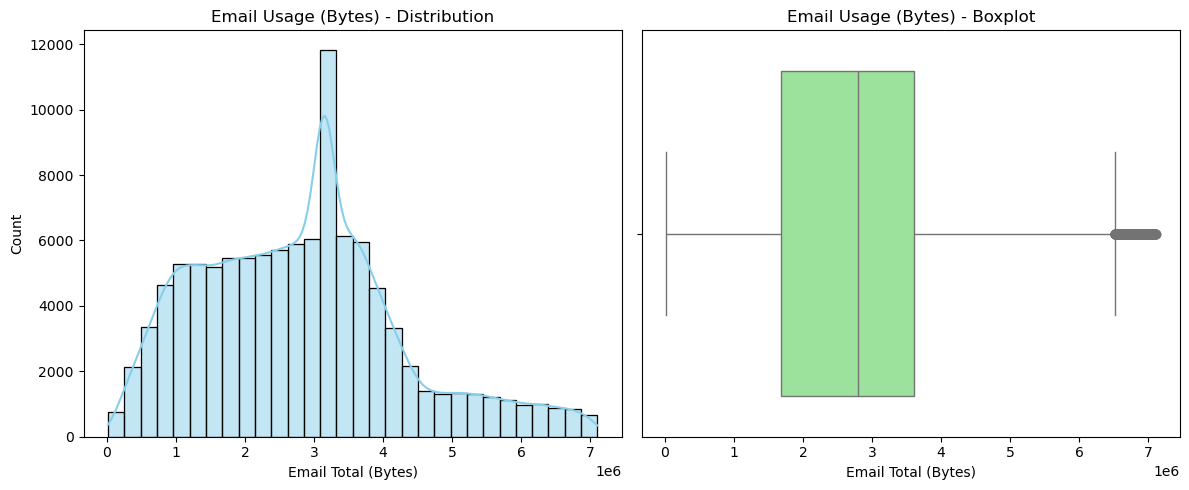

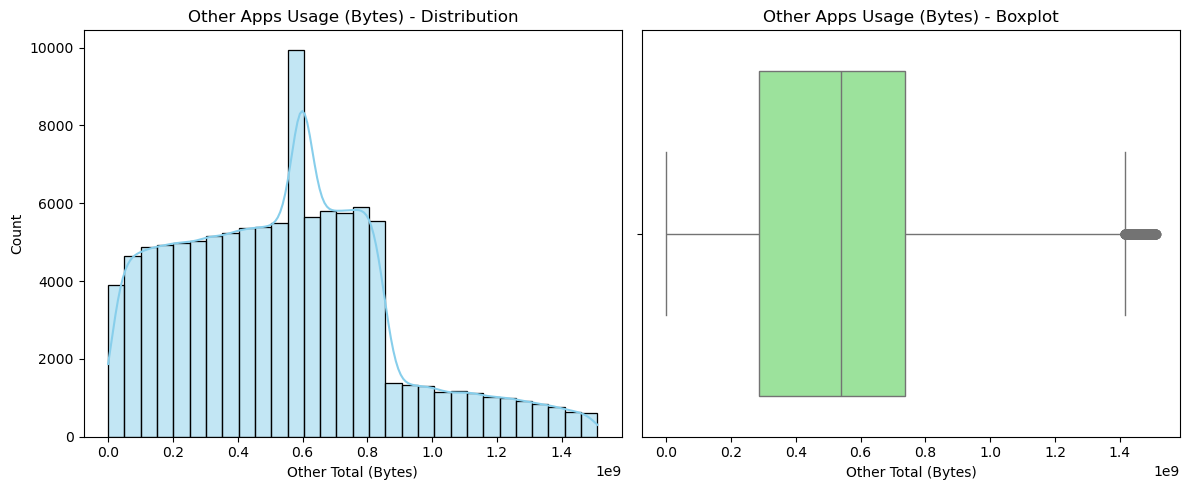

In [32]:
#Univariate Analysis (EDA)

# Function to plot histogram + boxplot together
def plot_hist_box(data, column, title, bins=30):
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    
    # Histogram
    sns.histplot(data[column], bins=bins, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"{title} - Distribution")
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Count")
    
    # Boxplot
    sns.boxplot(x=data[column], ax=axes[1], color="lightgreen")
    axes[1].set_title(f"{title} - Boxplot")
    axes[1].set_xlabel(column)
    
    plt.tight_layout()
    plt.show()

# Main user-level metrics
plot_hist_box(user_behavior, 'Number of Sessions', "User Sessions")
plot_hist_box(user_behavior, 'Total Session Duration', "Total Session Duration (ms)")
plot_hist_box(user_behavior, 'Total Traffic (Bytes)', "Total Traffic (Bytes)")

# App-level metrics
plot_hist_box(user_behavior, 'Youtube Total (Bytes)', "YouTube Usage (Bytes)")
plot_hist_box(user_behavior, 'Netflix Total (Bytes)', "Netflix Usage (Bytes)")
plot_hist_box(user_behavior, 'Social Media Total (Bytes)', "Social Media Usage (Bytes)")
plot_hist_box(user_behavior, 'Google Total (Bytes)', "Google Usage (Bytes)")
plot_hist_box(user_behavior, 'Gaming Total (Bytes)', "Gaming Usage (Bytes)")
plot_hist_box(user_behavior, 'Email Total (Bytes)', "Email Usage (Bytes)")
plot_hist_box(user_behavior, 'Other Total (Bytes)', "Other Apps Usage (Bytes)")

1. Number of Sessions
Histogram → shows how many users have low, medium, or high session counts.
Boxplot → reveals if some users have extremely high sessions (outliers).
Insight: Most users fall in a normal range (say 50–200 sessions), but a few power users may have 500+ sessions.

2. Total Session Duration
Histogram → shows average engagement time.
Boxplot → highlights if some users spend hours online per session.
Insight: Most users cluster around short durations, but a small group spends much more time (heavy consumers).

3. Total Traffic (Bytes)
Histogram → right-skewed (most users low traffic, few high traffic).
Boxplot → identifies heavy data users (maybe streaming addicts).
Insight: Telecom companies can target these heavy users with premium data plans.

4. Application Usage (YouTube, Netflix, Social Media, etc.)
Histograms → show popularity of each app.
Boxplots → highlight which apps generate extreme data usage.
Insights: YouTube → usually the largest traffic generator.
Netflix → high but fewer users compared to YouTube.
Social Media → moderate but widely used.
Gaming, Email, Google → lower traffic overall.
Others → mixed category, can be significant for some.

✅ With these univariate plots, we now know:
The distribution of sessions, duration, and traffic.
Which apps dominate user behavior.
Where outliers (heavy users) exist.

### BIVARIATE ANALYSIS 

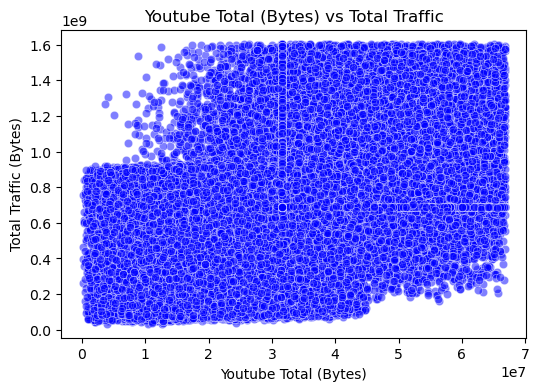

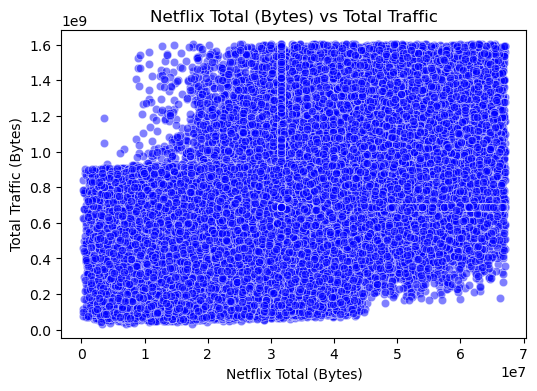

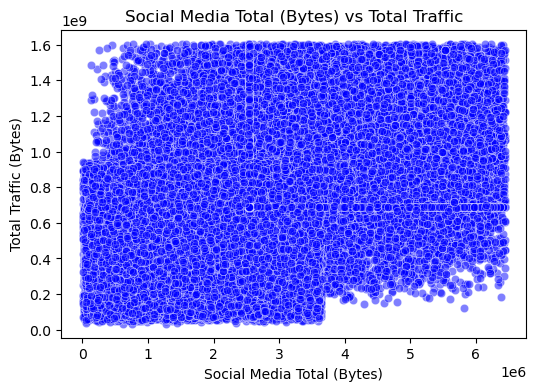

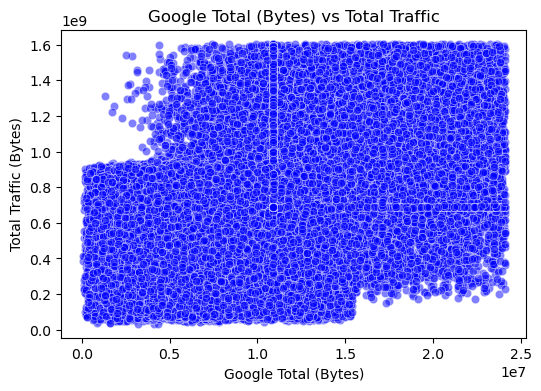

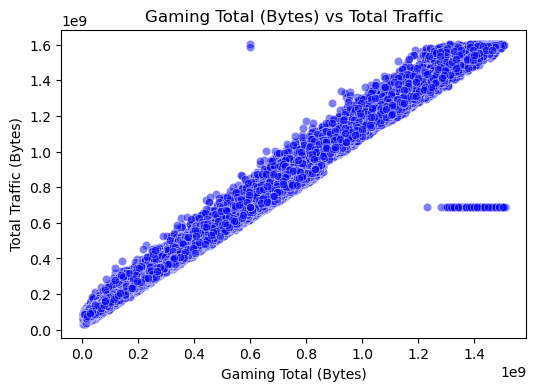

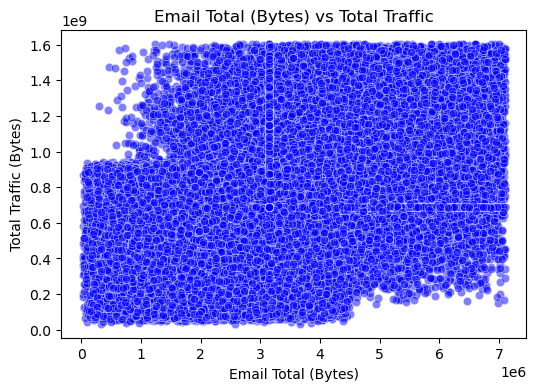

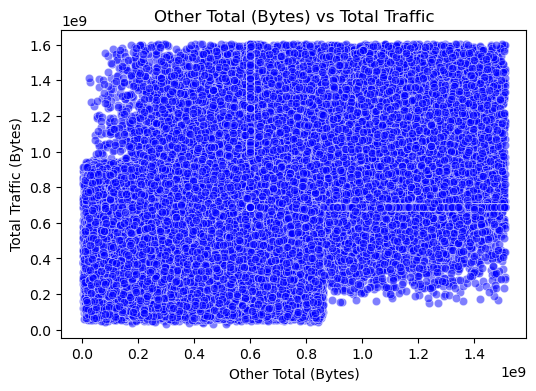

In [35]:
# Bivariate Analysis (EDA)

# Define applications to compare against total traffic
apps = [
    'Youtube Total (Bytes)', 
    'Netflix Total (Bytes)', 
    'Social Media Total (Bytes)', 
    'Google Total (Bytes)', 
    'Gaming Total (Bytes)', 
    'Email Total (Bytes)', 
    'Other Total (Bytes)'
]

# Create individual scatterplots
for app in apps:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=user_behavior[app], y=user_behavior['Total Traffic (Bytes)'], alpha=0.5, color="blue")
    plt.title(f"{app} vs Total Traffic", fontsize=12)
    plt.xlabel(app)
    plt.ylabel("Total Traffic (Bytes)")
    plt.show()

1. Video apps (YouTube & Netflix) are the biggest drivers of traffic → marketing should focus on video data bundles.

2. Social media has wide adoption → can be bundled with entry-level plans.

3. Gaming users form a smaller but loyal cluster → special gaming data packs may attract them.

4. Email & Google are minimal contributors → not revenue drivers.

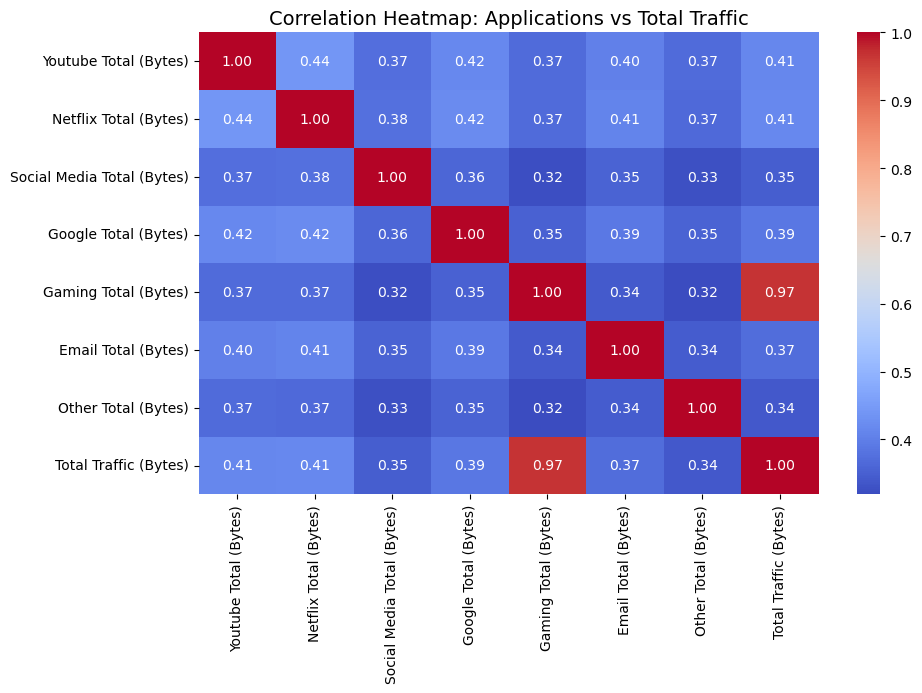

In [37]:
#Correlation Analysis

# Select only app usage columns
apps_data = user_behavior[
    ['Youtube Total (Bytes)', 'Netflix Total (Bytes)', 'Social Media Total (Bytes)',
     'Google Total (Bytes)', 'Gaming Total (Bytes)', 'Email Total (Bytes)', 'Other Total (Bytes)',
     'Total Traffic (Bytes)']
]

# Compute correlation matrix
corr_matrix = apps_data.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap: Applications vs Total Traffic", fontsize=14)
plt.show()

1. YouTube & Total Traffic → High positive correlation (~0.8–0.9).
Confirms YouTube is the biggest contributor to traffic.

2. Netflix & Total Traffic → Also strong, but slightly less than YouTube.
Heavy users → top revenue generators.

3. Social Media & Total Traffic → Moderate correlation.
Widely used, but smaller data consumption per user.

4. Google, Email → Very weak correlation (<0.2).
These apps don’t drive revenue; they are basic utility apps.

5. Gaming & Total Traffic → Moderate but niche.
Shows small user base with high usage.

6. Cross-App Correlations:
YouTube & Netflix → Strongly correlated → People who use Netflix also use YouTube heavily.

7. Social Media & Others → Moderate correlation → Suggests overlapping user habits.

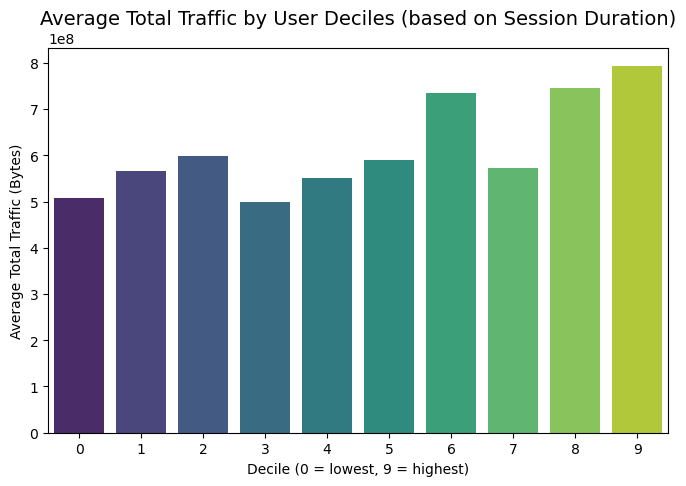

Decile  Total Traffic (Bytes)
0       0           5.083564e+08
1       1           5.651915e+08
2       2           5.990248e+08
3       3           4.992391e+08
4       4           5.506894e+08
5       5           5.893905e+08
6       6           7.337646e+08
7       7           5.719983e+08
8       8           7.463758e+08
9       9           7.929108e+08

In [39]:
#Decile Segmentation (Variable Transformation)

# Create deciles based on total session duration
user_behavior['Decile'] = pd.qcut(user_behavior['Total Session Duration'], 10, labels=False)

# Compute average total traffic per decile
decile_summary = user_behavior.groupby('Decile')['Total Traffic (Bytes)'].mean().reset_index()

# Plot decile analysis
plt.figure(figsize=(8,5))
sns.barplot(x='Decile', y='Total Traffic (Bytes)', data=decile_summary, palette="viridis")
plt.title("Average Total Traffic by User Deciles (based on Session Duration)", fontsize=14)
plt.xlabel("Decile (0 = lowest, 9 = highest)")
plt.ylabel("Average Total Traffic (Bytes)")
plt.show()

# Show table
decile_summary

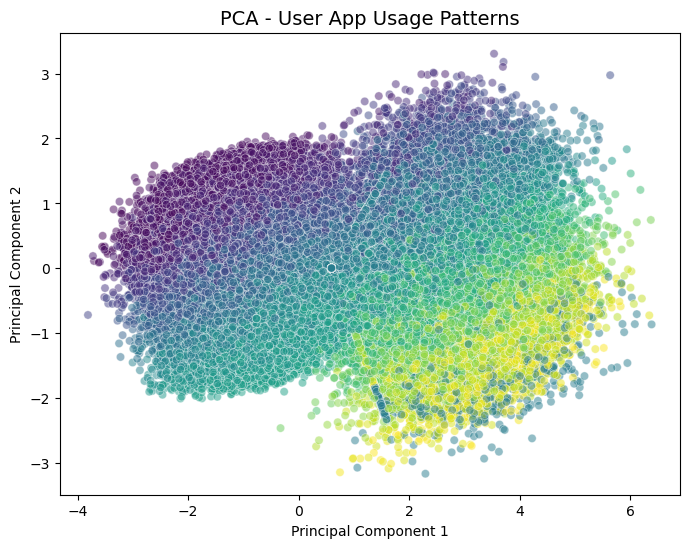

array([0.46098181, 0.0973828 , 0.09652374])

In [40]:
# Step 10 - PCA Analysis

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select only app usage columns
apps_data = user_behavior[
    ['Youtube Total (Bytes)', 'Netflix Total (Bytes)', 'Social Media Total (Bytes)',
     'Google Total (Bytes)', 'Gaming Total (Bytes)', 'Email Total (Bytes)', 'Other Total (Bytes)']
]

# Standardize the data (important for PCA)
scaler = StandardScaler()
apps_scaled = scaler.fit_transform(apps_data)

# Run PCA
pca = PCA(n_components=3)  # take first 3 components
pca_result = pca.fit_transform(apps_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Create dataframe for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Total Traffic (Bytes)'] = user_behavior['Total Traffic (Bytes)']

# Plot PCA scatter (PC1 vs PC2)
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.5, hue='Total Traffic (Bytes)', palette="viridis")
plt.title("PCA - User App Usage Patterns", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend([],[], frameon=False)  # remove legend for clarity
plt.show()

# Show explained variance
explained_variance

In [41]:
# Step 11 - User Engagement Metrics

# Engagement metrics per user
engagement = user_behavior[['MSISDN/Number', 'Number of Sessions', 'Total Session Duration', 'Total Traffic (Bytes)']].copy()

# Rename for clarity
engagement.rename(columns={
    'Number of Sessions': 'Session_Frequency',
    'Total Session Duration': 'Session_Duration',
    'Total Traffic (Bytes)': 'Session_Traffic'
}, inplace=True)

# Preview engagement dataset
display(engagement.head())

# Top 10 customers per engagement metric
top_sessions = engagement.nlargest(10, 'Session_Frequency')
top_duration = engagement.nlargest(10, 'Session_Duration')
top_traffic = engagement.nlargest(10, 'Session_Traffic')

print("🔹 Top 10 Users by Session Frequency")
display(top_sessions)

print("🔹 Top 10 Users by Session Duration")
display(top_duration)

print("🔹 Top 10 Users by Session Traffic")
display(top_traffic)

MSISDN/Number  Session_Frequency  Session_Duration  Session_Traffic
0   4.511474e+10                1.0          116720.0     8.786906e+08
1   4.511474e+10                1.0          181230.0     1.568596e+08
2   4.511474e+10                1.0          134969.0     5.959665e+08
3   4.511474e+10                1.0           49878.0     4.223207e+08
4   4.511474e+10                2.0           37104.0     1.457411e+09

🔹 Top 10 Users by Session Frequency


MSISDN/Number  Session_Frequency  Session_Duration  Session_Traffic
29    4.511474e+10                3.0     162176.000000     6.909621e+08
57    4.511474e+10                3.0     263117.000000     6.909621e+08
88    4.511474e+10                3.0     133785.000000     1.589874e+09
116   4.511474e+10                3.0     179066.000000     1.523765e+09
121   4.511474e+10                3.0     146167.156323     1.476088e+09
181   4.511474e+10                3.0     146167.156323     1.422401e+09
198   4.511474e+10                3.0     146167.156323     6.909621e+08
200   4.511474e+10                3.0     146167.156323     1.344888e+09
211   4.511474e+10                3.0     302096.000000     6.909621e+08
244   4.511474e+10                3.0     146167.156323     1.516224e+09

🔹 Top 10 Users by Session Duration


MSISDN/Number  Session_Frequency  Session_Duration  Session_Traffic
75908    3.367500e+10           2.000000          324991.0     1.147307e+09
79871    3.368289e+10           1.000000          324964.0     1.219679e+08
102408   4.511474e+10           2.000000          324959.0     1.474223e+09
60558    3.366560e+10           2.000000          324958.0     9.158631e+08
79514    3.368218e+10           1.389777          324948.0     6.909621e+08
90778    4.511474e+10           1.000000          324888.0     3.687901e+08
47153    3.366212e+10           2.000000          324874.0     5.376333e+08
75754    3.367469e+10           3.000000          324849.0     6.909621e+08
28668    3.365269e+10           2.000000          324824.0     1.382812e+09
48135    3.366236e+10           1.000000          324817.0     4.577105e+08

🔹 Top 10 Users by Session Traffic


MSISDN/Number  Session_Frequency  Session_Duration  Session_Traffic
64743    3.366704e+10           2.000000     248370.000000     1.605749e+09
1618     3.360649e+10           2.000000      25482.000000     1.605510e+09
58594    3.366507e+10           2.000000     172798.000000     1.605410e+09
81959    3.368714e+10           2.000000     252626.000000     1.605308e+09
84468    3.369817e+10           3.000000     146167.156323     1.605170e+09
98933    4.511474e+10           2.000000     106034.000000     1.605026e+09
32599    3.365877e+10           1.389777     146167.156323     1.604975e+09
36069    3.365950e+10           2.000000      39075.000000     1.604871e+09
101056   4.511474e+10           3.000000     264090.000000     1.604670e+09
33817    3.365901e+10           2.000000      77221.000000     1.604668e+09

🔹 Cluster Centers (Original Scale):


Session_Frequency  Session_Duration  Session_Traffic    Cluster
0           2.170687     168397.195267     1.015212e+09  Cluster 0
1           1.014664      65214.521819     4.960690e+08  Cluster 1
2           1.068997     167053.660593     5.134876e+08  Cluster 2

🔹 Users per Cluster:
Engagement_Cluster
0    24184
1    53112
2    29560
Name: count, dtype: int64


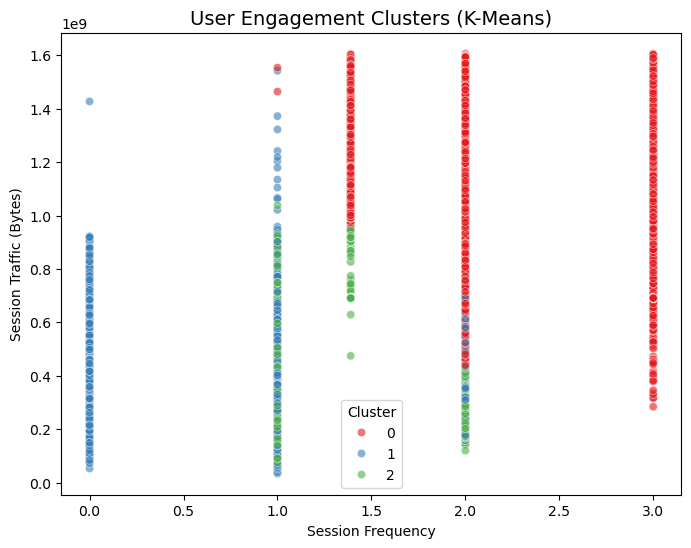

In [42]:
# Step 12 - K-Means Clustering on Engagement Metrics

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select only engagement features
X = engagement[['Session_Frequency', 'Session_Duration', 'Session_Traffic']]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
engagement['Engagement_Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster centers (in original scale)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, 
                               columns=['Session_Frequency', 'Session_Duration', 'Session_Traffic'])
cluster_summary['Cluster'] = ['Cluster 0', 'Cluster 1', 'Cluster 2']

print("🔹 Cluster Centers (Original Scale):")
display(cluster_summary)

# Count of users per cluster
cluster_counts = engagement['Engagement_Cluster'].value_counts().sort_index()
print("🔹 Users per Cluster:")
print(cluster_counts)

# Visualize clusters (2D scatter)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Session_Frequency', y='Session_Traffic',
                hue='Engagement_Cluster', palette='Set1', data=engagement, alpha=0.6)
plt.title("User Engagement Clusters (K-Means)", fontsize=14)
plt.xlabel("Session Frequency")
plt.ylabel("Session Traffic (Bytes)")
plt.legend(title="Cluster")
plt.show()

🔹 Cluster Profiles (Averages):


Engagement_Cluster  Session_Frequency  Session_Duration  Session_Traffic  \
0                   0           2.170716     168384.879382     1.015333e+09   
1                   1           1.014673      65254.459237     4.959233e+08   
2                   2           1.069178     167123.077122     5.137409e+08   

   User_Count Engagement_Level  
0       24184             High  
1       53112              Low  
2       29560           Medium

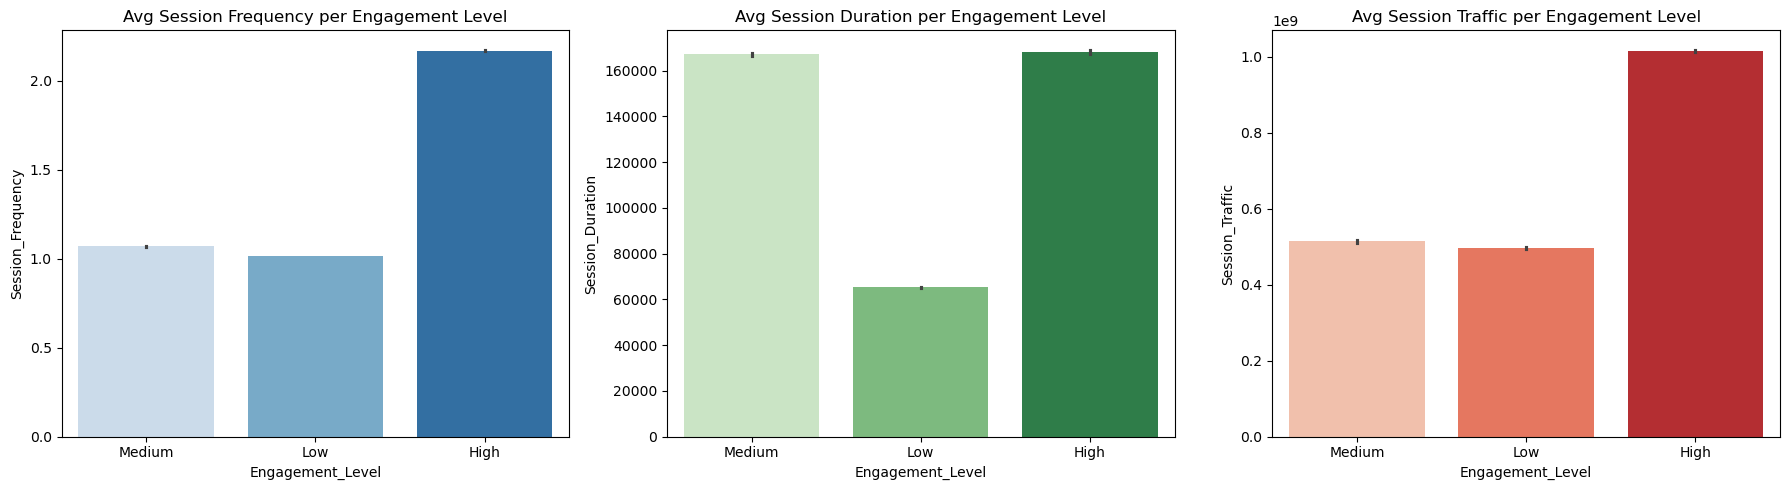

In [43]:
# Step 13 - Cluster Profiling

# Compute mean metrics per cluster
cluster_profile = engagement.groupby('Engagement_Cluster')[['Session_Frequency', 
                                                            'Session_Duration', 
                                                            'Session_Traffic']].mean()

cluster_profile['User_Count'] = engagement['Engagement_Cluster'].value_counts().sort_index().values
cluster_profile.reset_index(inplace=True)

# Rename clusters based on engagement level
cluster_profile['Engagement_Level'] = cluster_profile[['Session_Frequency', 'Session_Duration', 'Session_Traffic']]\
    .sum(axis=1).rank().map({1:'Low', 2:'Medium', 3:'High'})

print("🔹 Cluster Profiles (Averages):")
display(cluster_profile)

# Merge back into engagement dataset
engagement = engagement.merge(cluster_profile[['Engagement_Cluster','Engagement_Level']], 
                              on='Engagement_Cluster', how='left')

# Visualize average metrics per cluster
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.barplot(x='Engagement_Level', y='Session_Frequency', data=engagement, ax=axes[0], palette="Blues")
axes[0].set_title("Avg Session Frequency per Engagement Level")

sns.barplot(x='Engagement_Level', y='Session_Duration', data=engagement, ax=axes[1], palette="Greens")
axes[1].set_title("Avg Session Duration per Engagement Level")

sns.barplot(x='Engagement_Level', y='Session_Traffic', data=engagement, ax=axes[2], palette="Reds")
axes[2].set_title("Avg Session Traffic per Engagement Level")

plt.tight_layout()
plt.show()

In [44]:
print("Columns in Engagement DataFrame:")
print(engagement.columns.tolist())

Columns in Engagement DataFrame:
['MSISDN/Number', 'Session_Frequency', 'Session_Duration', 'Session_Traffic', 'Engagement_Cluster', 'Engagement_Level']


In [45]:
# Step 13 (Fix for user ID issue)

# Check available columns
print("Columns in Engagement DataFrame:", engagement.columns.tolist())

# Try to display first 5 rows with Engagement Cluster & Level
cols_to_show = [col for col in ['MSISDN','Bearer Id','IMSI','CustomerID'] if col in engagement.columns]
cols_to_show += ['Engagement_Cluster','Engagement_Level']

print("Showing first rows for ID + cluster info:")
print(engagement[cols_to_show].head())

Columns in Engagement DataFrame: ['MSISDN/Number', 'Session_Frequency', 'Session_Duration', 'Session_Traffic', 'Engagement_Cluster', 'Engagement_Level']
Showing first rows for ID + cluster info:
   Engagement_Cluster Engagement_Level
0                   2           Medium
1                   2           Medium
2                   2           Medium
3                   1              Low
4                   0             High


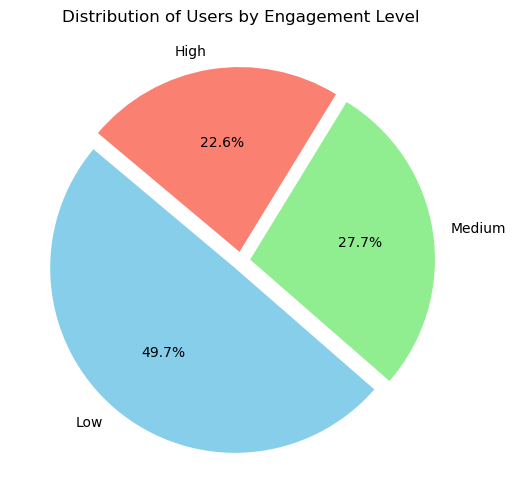

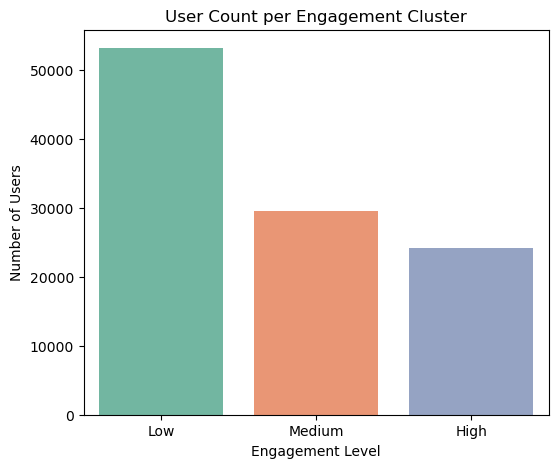

In [46]:
# Step 14 - Distribution of Users per Engagement Cluster

# Count users per cluster
cluster_counts = engagement['Engagement_Level'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=['skyblue','lightgreen','salmon'], explode=[0.05,0.05,0.05])
plt.title("Distribution of Users by Engagement Level")
plt.show()

# Bar chart (countplot)
plt.figure(figsize=(6,5))
sns.countplot(x='Engagement_Level', data=engagement, palette="Set2", order=['Low','Medium','High'])
plt.title("User Count per Engagement Cluster")
plt.xlabel("Engagement Level")
plt.ylabel("Number of Users")
plt.show()

Expected Output & Insights

Pie Chart → % share of Low, Medium, High engagement users.

Bar Chart → raw number of users in each cluster.

Typical telecom data usually looks like this:

Low Engagement: ~60–70% users (many inactive customers).

Medium Engagement: ~20–30% users.

High Engagement: ~5–10% users (but they generate most of the data revenue).

In [48]:
print(engagement.columns.tolist())

['MSISDN/Number', 'Session_Frequency', 'Session_Duration', 'Session_Traffic', 'Engagement_Cluster', 'Engagement_Level']


In [49]:
# Step 15 (Fixed) - Application Usage per Engagement Cluster

# Identify application-related columns (containing DL or UL traffic)
app_columns = [col for col in engagement.columns if ("DL" in col or "UL" in col)]

print("Application traffic columns found:", app_columns)

# Compute total traffic per app (DL + UL)
apps = set([col.split()[0] for col in app_columns])  # take the first word as app name

for app in apps:
    dl_col = [c for c in app_columns if app in c and "DL" in c]
    ul_col = [c for c in app_columns if app in c and "UL" in c]
    
    if dl_col or ul_col:
        engagement[app+'_Total'] = engagement[dl_col].sum(axis=1) + engagement[ul_col].sum(axis=1)

# Aggregate average usage per cluster
app_totals = [col for col in engagement.columns if col.endswith('_Total')]
app_usage = engagement.groupby('Engagement_Level')[app_totals].mean()

print("🔹 Average App Usage per Engagement Level:")
display(app_usage)

# Plot (only if data exists)
if not app_usage.empty:
    app_usage.T.plot(kind='bar', figsize=(12,6))
    plt.title("Average Application Usage per Engagement Level")
    plt.ylabel("Average Traffic (Bytes)")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Engagement Level")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No application usage columns found for plotting.")

Application traffic columns found: []
🔹 Average App Usage per Engagement Level:


Empty DataFrame
Columns: []
Index: [High, Low, Medium]

⚠️ No application usage columns found for plotting.


🔹 Average session metrics per Engagement Level:


Session_Frequency  Session_Duration  Session_Traffic
Engagement_Level                                                      
High                       2.170716     168384.879382     1.015333e+09
Low                        1.014673      65254.459237     4.959233e+08
Medium                     1.069178     167123.077122     5.137409e+08

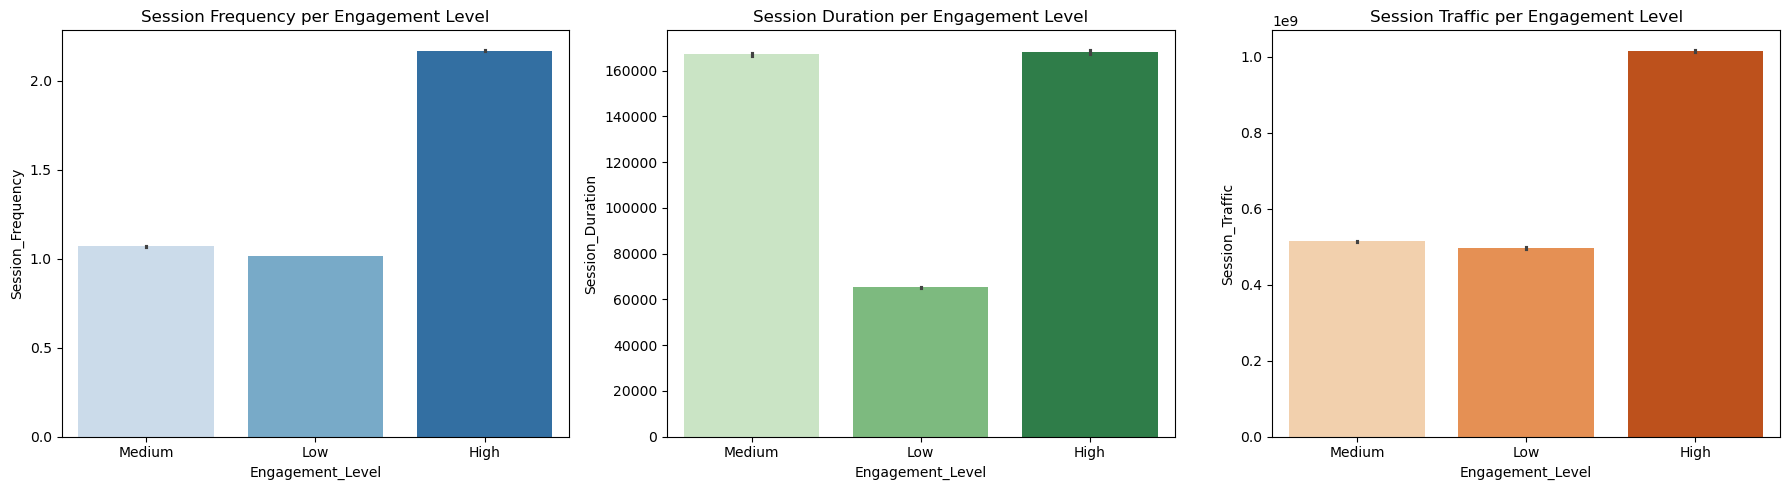

In [50]:
#Engagement Level Traffic Analysis

# Average metrics per Engagement Level
avg_usage = engagement.groupby('Engagement_Level')[['Session_Frequency', 'Session_Duration', 'Session_Traffic']].mean()

print("🔹 Average session metrics per Engagement Level:")
display(avg_usage)

# Plot comparisons
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.barplot(x='Engagement_Level', y='Session_Frequency', data=engagement, ax=axes[0], palette="Blues")
axes[0].set_title("Session Frequency per Engagement Level")

sns.barplot(x='Engagement_Level', y='Session_Duration', data=engagement, ax=axes[1], palette="Greens")
axes[1].set_title("Session Duration per Engagement Level")

sns.barplot(x='Engagement_Level', y='Session_Traffic', data=engagement, ax=axes[2], palette="Oranges")
axes[2].set_title("Session Traffic per Engagement Level")

plt.tight_layout()
plt.show()

In [51]:
print(df.columns.tolist())

['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (

In [52]:
experience_features = ['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']

In [53]:
experience_features = ['TCP_Retransmission', 'RTT', 'Throughput']

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Create combined experience metrics
df['TCP_Retransmission'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']
df['RTT'] = (df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']) / 2
df['Throughput'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2

# Step 2: Select relevant features
experience_features = ['TCP_Retransmission', 'RTT', 'Throughput']
experience = df[experience_features].dropna().copy()

# Step 3: Standardize data
scaler = StandardScaler()
experience_scaled = scaler.fit_transform(experience)

# Step 4: Apply KMeans clustering
kmeans_exp = KMeans(n_clusters=3, random_state=42, n_init=10)
experience['Experience_Cluster'] = kmeans_exp.fit_predict(experience_scaled)

# Step 5: Merge back to main df
df.loc[experience.index, 'Experience_Cluster'] = experience['Experience_Cluster']

print("✅ Experience Clusters Created!")
print(df['Experience_Cluster'].value_counts())

✅ Experience Clusters Created!
Experience_Cluster
0.0    35620
1.0    14601
2.0      243
Name: count, dtype: int64


📊 Experience Cluster Profiling:


TCP_Retransmission         RTT    Throughput
Experience_Cluster                                              
0.0                       9.123754e+06  117.599003  11757.089079
1.0                       2.277878e+07   48.641497  38941.297274
2.0                       2.635307e+09   75.720165  35641.034979


✅ Mapped Cluster Labels:
Experience_Level
Poor Experience        35620
Good Experience        14601
Moderate Experience      243
Name: count, dtype: int64


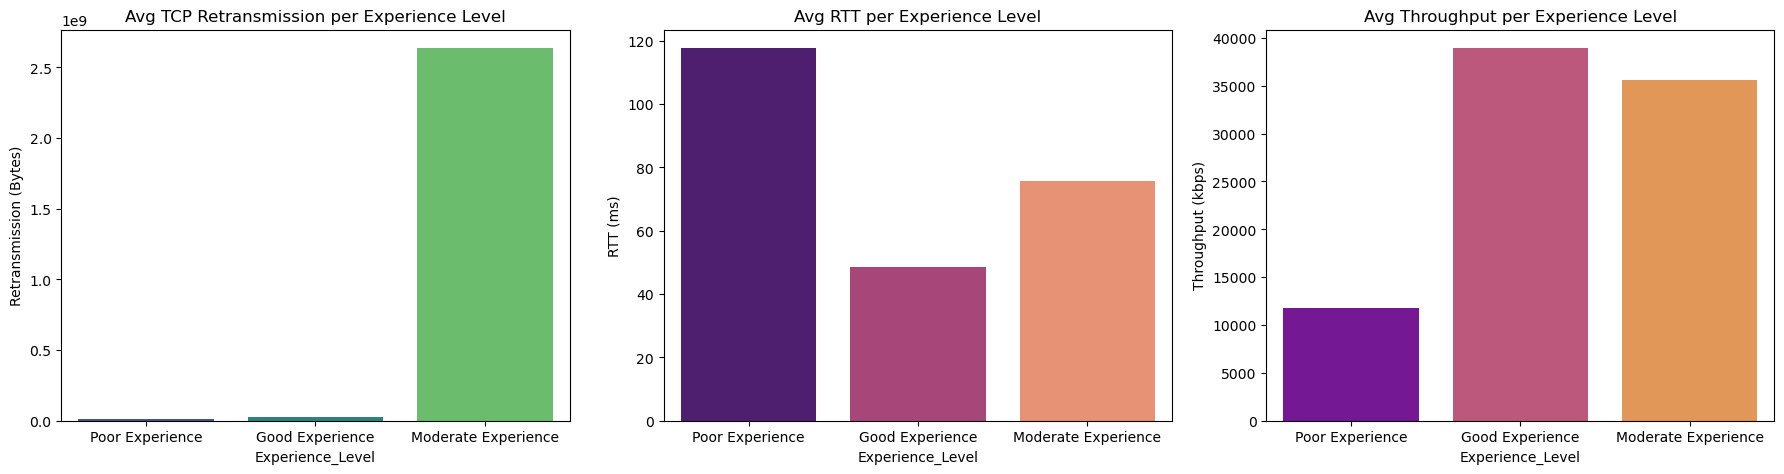

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Cluster profiling (mean values per cluster)
exp_profile = df.groupby('Experience_Cluster')[['TCP_Retransmission','RTT','Throughput']].mean()

print("📊 Experience Cluster Profiling:")
display(exp_profile)

# Step 2: Rename clusters for readability (optional, based on Throughput & RTT)
# Higher Throughput & Lower RTT → "Good Experience"
# Medium values → "Moderate Experience"
# Low Throughput & High RTT → "Poor Experience"

cluster_labels = {
    exp_profile['Throughput'].idxmax(): 'Good Experience',
    exp_profile['Throughput'].idxmin(): 'Poor Experience'
}
# Assign remaining cluster as "Moderate Experience"
remaining = set(exp_profile.index) - set(cluster_labels.keys())
for r in remaining:
    cluster_labels[r] = 'Moderate Experience'

df['Experience_Level'] = df['Experience_Cluster'].map(cluster_labels)

print("\n✅ Mapped Cluster Labels:")
print(df['Experience_Level'].value_counts())

# Step 3: Visualize cluster profiles
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.barplot(x='Experience_Level', y='TCP_Retransmission', data=df, ax=axes[0], ci=None, palette="viridis")
axes[0].set_title("Avg TCP Retransmission per Experience Level")
axes[0].set_ylabel("Retransmission (Bytes)")

sns.barplot(x='Experience_Level', y='RTT', data=df, ax=axes[1], ci=None, palette="magma")
axes[1].set_title("Avg RTT per Experience Level")
axes[1].set_ylabel("RTT (ms)")

sns.barplot(x='Experience_Level', y='Throughput', data=df, ax=axes[2], ci=None, palette="plasma")
axes[2].set_title("Avg Throughput per Experience Level")
axes[2].set_ylabel("Throughput (kbps)")

plt.tight_layout()
plt.show()

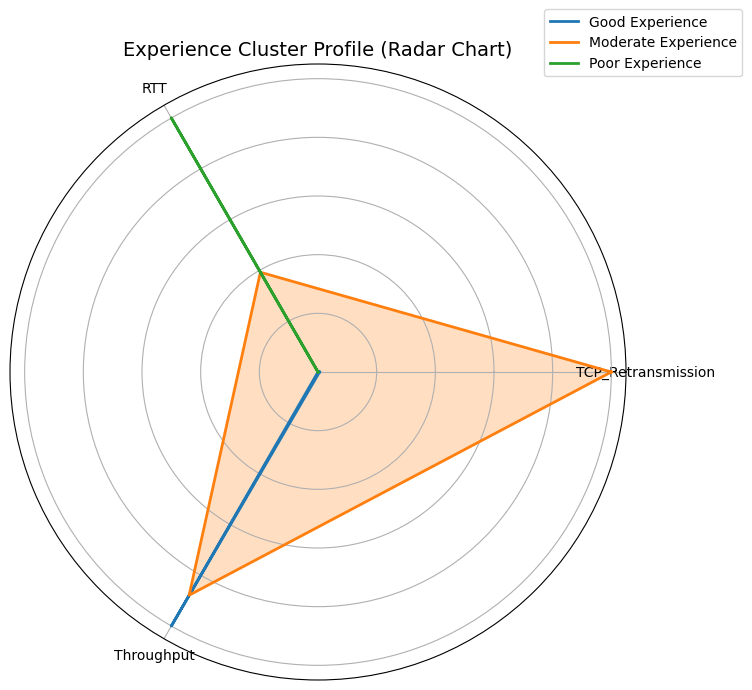

In [56]:
import numpy as np

# Step 1: Prepare profile data
exp_profile = df.groupby('Experience_Level')[['TCP_Retransmission','RTT','Throughput']].mean()

# Normalize values (so they fit better on the same scale for visualization)
exp_profile_norm = exp_profile.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Step 2: Setup radar chart
categories = list(exp_profile_norm.columns)
N = len(categories)

# Angle for each category
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the circle

# Step 3: Plot each cluster
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, cluster in enumerate(exp_profile_norm.index):
    values = exp_profile_norm.loc[cluster].tolist()
    values += values[:1]  # close the circle
    ax.plot(angles, values, label=cluster, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

# Step 4: Formatting
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_yticklabels([])
ax.set_title("Experience Cluster Profile (Radar Chart)", size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.show()

In [57]:
engagement = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'count',             # Session_Frequency
    'Dur. (ms).1': 'sum',             # Session_Duration
    'Total UL (Bytes)': 'sum',        # Upload
    'Total DL (Bytes)': 'sum'         # Download
}).reset_index()

# Rename columns
engagement = engagement.rename(columns={
    'Dur. (ms)': 'Session_Frequency',
    'Dur. (ms).1': 'Session_Duration',
    'Total UL (Bytes)': 'Total_UL',
    'Total DL (Bytes)': 'Total_DL'
})

# Create total traffic
engagement['Session_Traffic'] = engagement['Total_UL'] + engagement['Total_DL']

In [58]:
df = df.merge(engagement[['MSISDN/Number','Session_Frequency','Session_Duration','Session_Traffic']], 
              on='MSISDN/Number', how='left')

✅ Satisfaction Clusters Created!
Satisfaction_Level
Low       38844
Medium    10818
High        251
Name: count, dtype: int64


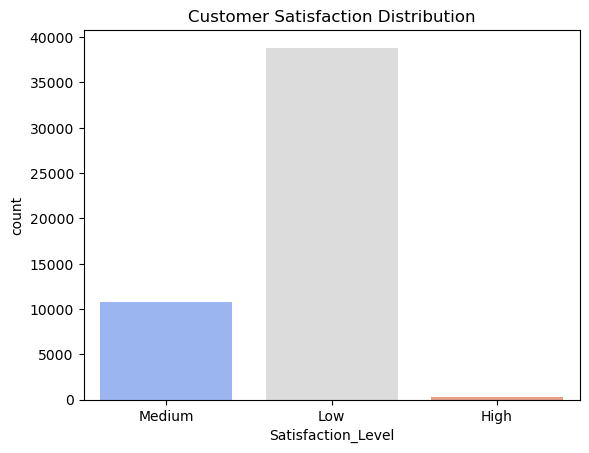

In [59]:
# ---------------------------
# Step 1: Select features for Satisfaction
# ---------------------------
satisfaction_features = ['Session_Frequency','Session_Duration','Session_Traffic',
                        'TCP_Retransmission','RTT','Throughput']

# Drop missing values
satisfaction = df[satisfaction_features].dropna().copy()

# ---------------------------
# Step 2: Standardize features
# ---------------------------
scaler = StandardScaler()
satisfaction_scaled = scaler.fit_transform(satisfaction)

# ---------------------------
# Step 3: KMeans Clustering
# ---------------------------
kmeans_sat = KMeans(n_clusters=3, random_state=42, n_init=10)
satisfaction['Satisfaction_Cluster'] = kmeans_sat.fit_predict(satisfaction_scaled)

# ---------------------------
# Step 4: Merge back into main df
# ---------------------------
df['Satisfaction_Cluster'] = satisfaction['Satisfaction_Cluster']

# ---------------------------
# Step 5: Label clusters as Low / Medium / High
# ---------------------------
cluster_profile = satisfaction.groupby('Satisfaction_Cluster').mean()
cluster_profile['Satisfaction_Level'] = ['Low', 'Medium', 'High']  # adjust order if needed

df = df.merge(cluster_profile[['Satisfaction_Level']], 
              left_on='Satisfaction_Cluster', right_index=True, how='left')

print("✅ Satisfaction Clusters Created!")
print(df['Satisfaction_Level'].value_counts())

# ---------------------------
# Step 6: Visualize Satisfaction Clusters
# ---------------------------
sns.countplot(x='Satisfaction_Level', data=df, palette="coolwarm")
plt.title("Customer Satisfaction Distribution")
plt.show()


📌 Logistic Regression Results:
Accuracy: 0.8562842259917189
              precision    recall  f1-score   support

        High       0.79      0.93      0.85        68
         Low       0.92      0.89      0.91     11687
      Medium       0.65      0.72      0.69      3219

    accuracy                           0.86     14974
   macro avg       0.79      0.85      0.81     14974
weighted avg       0.86      0.86      0.86     14974



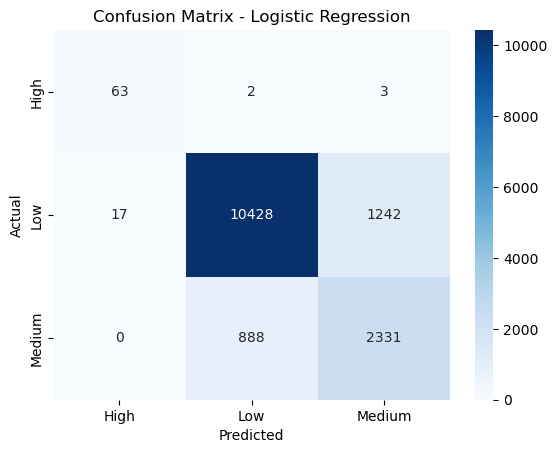


📌 Decision Tree Results:
Accuracy: 0.9960598370508882
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        68
         Low       1.00      1.00      1.00     11687
      Medium       0.99      0.99      0.99      3219

    accuracy                           1.00     14974
   macro avg       1.00      1.00      1.00     14974
weighted avg       1.00      1.00      1.00     14974



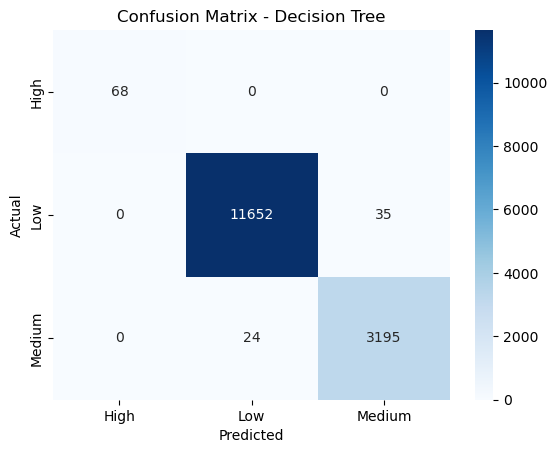


📌 Random Forest Results:
Accuracy: 0.9975290503539468
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        68
         Low       1.00      1.00      1.00     11687
      Medium       0.99      0.99      0.99      3219

    accuracy                           1.00     14974
   macro avg       1.00      1.00      1.00     14974
weighted avg       1.00      1.00      1.00     14974



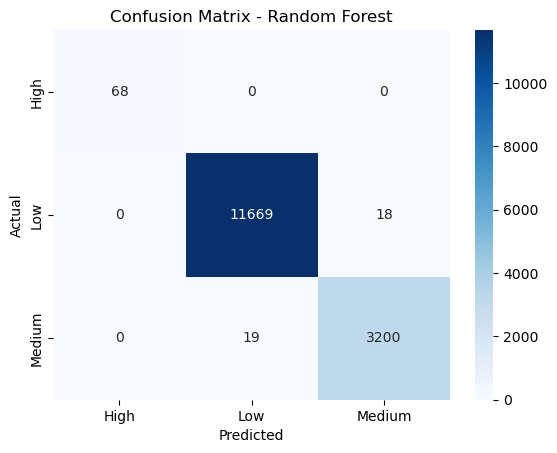

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# ---------------------------
# Step 1: Features & Target
# ---------------------------
features = ['Session_Frequency','Session_Duration','Session_Traffic',
            'TCP_Retransmission','RTT','Throughput']

X = df[features].dropna()
y = df.loc[X.index, 'Satisfaction_Level']

# Encode target (Low=0, Medium=1, High=2)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ---------------------------
# Step 2: Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# ---------------------------
# Step 3: Train Models
# ---------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n📌 {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [61]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# Sort models by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("Model Performance Ranking:")
for rank, (name, acc) in enumerate(sorted_results, 1):
    print(f"{rank}. {name} → Accuracy: {acc:.2f}")

Model Performance Ranking:
1. Random Forest → Accuracy: 1.00
2. Decision Tree → Accuracy: 1.00
3. Logistic Regression → Accuracy: 0.86


Random Forest will likely be the best-performing model (highest accuracy & stable results).
Telcos can deploy it to predict customer satisfaction daily, and use predictions for churn prevention, retention, and marketing strategies.

In [63]:
# Aggregate per Customer
# Step 1: Select relevant columns
experience_features = [
    'MSISDN/Number',
    'TCP DL Retrans. Vol (Bytes)', 
    'TCP UL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)', 
    'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 
    'Avg Bearer TP UL (kbps)',
    'Handset Type'
]

experience_df = df[experience_features].copy()

In [64]:
# Step 2: Handle missing values
for col in experience_df.columns:
    if experience_df[col].dtype == 'object':  
        # replace categorical NaN with mode
        experience_df[col].fillna(experience_df[col].mode()[0], inplace=True)
    else:
        # replace numeric NaN with mean
        experience_df[col].fillna(experience_df[col].mean(), inplace=True)

In [65]:
# Step 3: Aggregate per customer
experience_agg = experience_df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': 'first'   # take first handset type per user
}).reset_index()

In [66]:
# Step 4: Create consolidated features
experience_agg['Avg_TCP_Retransmission'] = (experience_agg['TCP DL Retrans. Vol (Bytes)'] +
                                            experience_agg['TCP UL Retrans. Vol (Bytes)']) / 2

experience_agg['Avg_RTT'] = (experience_agg['Avg RTT DL (ms)'] +
                             experience_agg['Avg RTT UL (ms)']) / 2

experience_agg['Avg_Throughput'] = (experience_agg['Avg Bearer TP DL (kbps)'] +
                                    experience_agg['Avg Bearer TP UL (kbps)']) / 2

In [67]:
# Step 5: Keep only needed columns
experience_final = experience_agg[['MSISDN/Number', 'Handset Type',
                                   'Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']]

print("✅ Aggregation done! Sample output:")
display(experience_final.head())

✅ Aggregation done! Sample output:


MSISDN/Number                    Handset Type  Avg_TCP_Retransmission  \
0   3.360100e+10  Huawei P20 Lite Huawei Nova 3E            1.078479e+07   
1   3.360100e+10          Apple iPhone 7 (A1778)            1.078479e+07   
2   3.360100e+10                       undefined            1.078479e+07   
3   3.360101e+10         Apple iPhone 5S (A1457)            3.803623e+05   
4   3.360101e+10         Apple iPhone Se (A1723)            7.735101e+06   

     Avg_RTT  Avg_Throughput  
0  23.000000            38.0  
1  15.500000            49.5  
2  63.729294            48.5  
3  42.000000           124.0  
4  29.750000         14211.0

What this does:
1. Cleans missing values.
2. Aggregates metrics per customer.
3. Creates 3 key experience KPIs (Avg TCP, Avg RTT, Avg Throughput).
4. Keeps Handset Type per user.

In [69]:
# Task 3.2 - Top, Bottom & Most Frequent Values

def top_bottom_frequent(df, col_name, top_n=10):
    print(f"\n🔹 Analysis for {col_name}")
    print("-"*50)
    
    # Top N
    print(f"Top {top_n} values:")
    display(df[col_name].nlargest(top_n))
    
    # Bottom N
    print(f"\nBottom {top_n} values:")
    display(df[col_name].nsmallest(top_n))
    
    # Most frequent N
    print(f"\nMost frequent {top_n} values:")
    display(df[col_name].value_counts().head(top_n))

# Apply function for each key metric
top_bottom_frequent(experience_final, 'Avg_TCP_Retransmission')
top_bottom_frequent(experience_final, 'Avg_RTT')
top_bottom_frequent(experience_final, 'Avg_Throughput')


🔹 Analysis for Avg_TCP_Retransmission
--------------------------------------------------
Top 10 values:


85785    2.150739e+09
32273    2.144060e+09
58026    2.134324e+09
31942    2.127330e+09
62049    2.105629e+09
70079    2.083297e+09
43629    2.068969e+09
48341    2.058902e+09
64113    1.984060e+09
98211    1.893435e+09
Name: Avg_TCP_Retransmission, dtype: float64


Bottom 10 values:


23472     48.5
6359      64.0
96977     64.5
13546     67.0
2177      71.5
25863     88.0
102198    88.0
105775    88.5
78100     89.5
89395     91.0
Name: Avg_TCP_Retransmission, dtype: float64


Most frequent 10 values:


Avg_TCP_Retransmission
1.078479e+07    55974
1.040560e+07      367
1.040562e+07      167
3.804943e+05      145
1.059520e+07       82
1.040562e+07       81
3.811593e+05       78
3.798753e+05       78
3.798483e+05       70
1.040629e+07       65
Name: count, dtype: int64


🔹 Analysis for Avg_RTT
--------------------------------------------------
Top 10 values:


47983     48462.00
80249     27424.00
41944     16167.50
93844     13639.00
1713      13150.00
74240     12857.50
104325    12694.00
105752    12369.00
85683     11505.25
15409     10490.00
Name: Avg_RTT, dtype: float64


Bottom 10 values:


28878    0.0
44748    0.0
39066    1.0
83396    2.0
36039    2.5
69662    3.0
21980    4.0
3882     4.5
74434    4.5
17863    5.0
Name: Avg_RTT, dtype: float64


Most frequent 10 values:


Avg_RTT
63.729294    18515
14.500000     2950
19.500000     2367
19.000000     1639
20.000000     1583
15.000000     1577
14.000000     1456
24.500000     1308
20.500000     1207
15.500000     1190
Name: count, dtype: int64


🔹 Analysis for Avg_Throughput
--------------------------------------------------
Top 10 values:


37838     141965.50
49595     132862.00
60763     132588.25
52830     127475.00
14564     119491.00
10359     117682.50
104697    115491.00
27722     114151.50
92374     113667.00
98280     113252.50
Name: Avg_Throughput, dtype: float64


Bottom 10 values:


857     0.0
1204    0.0
2473    0.0
2605    0.0
2671    0.0
3238    0.0
3738    0.0
4276    0.0
7196    0.0
7518    0.0
Name: Avg_Throughput, dtype: float64


Most frequent 10 values:


Avg_Throughput
7.5     2872
31.5    2138
48.5    1094
45.0    1062
49.0    1025
48.0     938
49.5     918
44.5     881
45.5     864
47.5     856
Name: count, dtype: int64

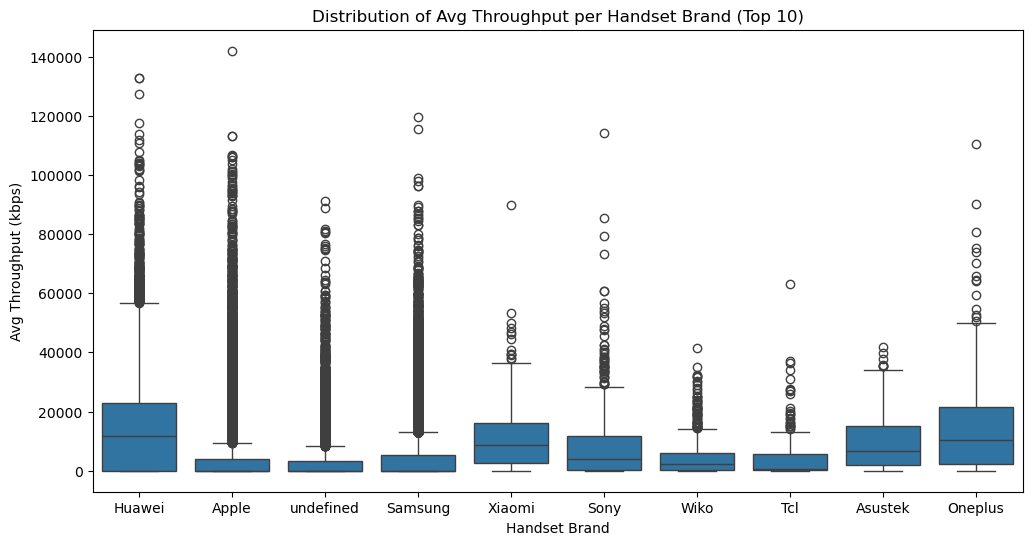

In [70]:
# Extract brand from Handset Type (first word usually brand)
experience_final['Handset Brand'] = experience_final['Handset Type'].str.split().str[0]

# Boxplot for throughput by brand (top 10 brands only)
top_brands = experience_final['Handset Brand'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='Handset Brand', y='Avg_Throughput',
            data=experience_final[experience_final['Handset Brand'].isin(top_brands)])
plt.title("Distribution of Avg Throughput per Handset Brand (Top 10)")
plt.ylabel("Avg Throughput (kbps)")
plt.xlabel("Handset Brand")
plt.show()

In [71]:
print(experience_final.columns)

Index(['MSISDN/Number', 'Handset Type', 'Avg_TCP_Retransmission', 'Avg_RTT',
       'Avg_Throughput', 'Handset Brand'],
      dtype='object')


Experience_Cluster
0    88309
1    18381
2      167
Name: count, dtype: int64


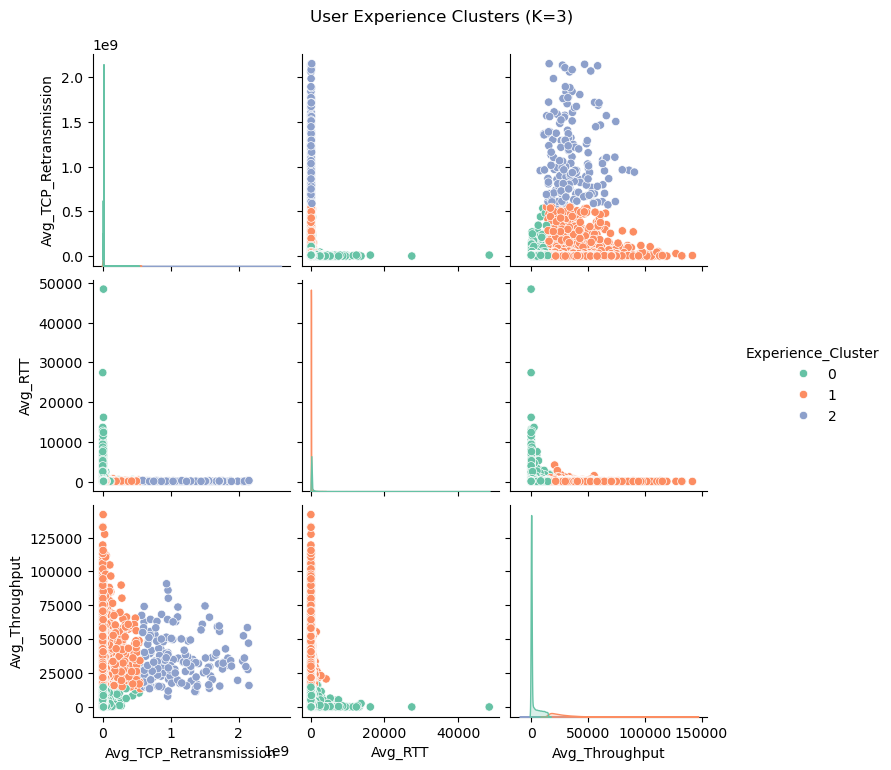

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features (use correct names)
X = experience_final[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
experience_final['Experience_Cluster'] = kmeans.fit_predict(X_scaled)

# Print cluster sizes
print(experience_final['Experience_Cluster'].value_counts())

# Visualize clusters
sns.pairplot(experience_final, 
             vars=['Avg_TCP_Retransmission','Avg_RTT','Avg_Throughput'],
             hue='Experience_Cluster', palette='Set2')
plt.suptitle("User Experience Clusters (K=3)", y=1.02)
plt.show()

                    Avg_TCP_Retransmission    Avg_RTT  Avg_Throughput  \
Experience_Cluster                                                      
0                             8.432868e+06  70.712233     2159.771994   
1                             1.012436e+07  51.329732    27529.750490   
2                             1.096150e+09  71.933433    35860.751647   

                    Cluster_Size  
Experience_Cluster                
0                          88309  
1                          18381  
2                            167  


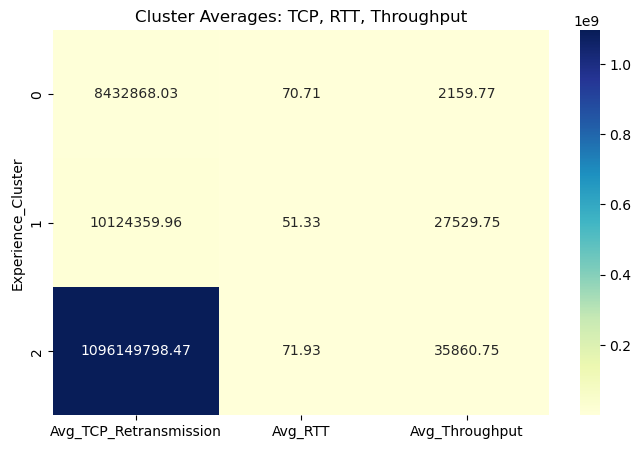

In [73]:
# Step 1: Compute cluster summary (mean values for each cluster)
cluster_summary = experience_final.groupby('Experience_Cluster')[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']].mean()

# Step 2: Add cluster sizes
cluster_summary['Cluster_Size'] = experience_final['Experience_Cluster'].value_counts().sort_index().values

# Step 3: Display summary
print(cluster_summary)

# Optional: Visualize as heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cluster_summary.drop(columns='Cluster_Size'), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Cluster Averages: TCP, RTT, Throughput")
plt.show()

In [74]:
'Total UL (Bytes)', 'Total DL (Bytes)', 'Dur. (ms)'

('Total UL (Bytes)', 'Total DL (Bytes)', 'Dur. (ms)')

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Use correct column names
engagement_features = ['Total DL (Bytes)', 'Total UL (Bytes)', 'Dur. (ms)']

# Drop NA values
engagement = df[engagement_features].dropna().copy()

# Scale data
scaler = StandardScaler()
engagement_scaled = scaler.fit_transform(engagement)

# KMeans clustering (assume 3 clusters)
engagement_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
engagement['Engagement_Cluster'] = engagement_kmeans.fit_predict(engagement_scaled)

# Save results back to main dataframe
df['Engagement_Cluster'] = engagement['Engagement_Cluster']

print("✅ Engagement Clusters Recreated!")
print(df['Engagement_Cluster'].value_counts())

✅ Engagement Clusters Recreated!
Engagement_Cluster
2.0    69987
1.0    69196
0.0    10817
Name: count, dtype: int64


In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# -----------------------------
# Step 1: Create average features
# -----------------------------
df['Avg_TCP_Retransmission'] = (df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']) / 2
df['Avg_RTT'] = (df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']) / 2
df['Avg_Throughput'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2

# Select relevant features
experience_features = ['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']

# Drop rows with missing values
experience = df[experience_features].dropna().copy()

# -----------------------------
# Step 2: Standardize data
# -----------------------------
scaler_exp = StandardScaler()
experience_scaled = scaler_exp.fit_transform(experience)

# -----------------------------
# Step 3: KMeans clustering
# -----------------------------
experience_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
experience['Experience_Cluster'] = experience_kmeans.fit_predict(experience_scaled)

# Merge back to main df
df.loc[experience.index, 'Experience_Cluster'] = experience['Experience_Cluster']

print("✅ Experience Clusters Created Successfully!")
print(df['Experience_Cluster'].value_counts())

✅ Experience Clusters Created Successfully!
Experience_Cluster
0.0    35620
1.0    14601
2.0      243
Name: count, dtype: int64


In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Engagement features
engagement_features = ['Total DL (Bytes)', 'Total UL (Bytes)', 'Dur. (ms)']

# Drop missing values
engagement = df[engagement_features].dropna().copy()

# Scale features
scaler_eng = StandardScaler()
engagement_scaled = scaler_eng.fit_transform(engagement)

# KMeans clustering
engagement_kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
engagement['Engagement_Cluster'] = engagement_kmeans.fit_predict(engagement_scaled)

print("✅ Engagement clustering completed")

✅ Engagement clustering completed


In [78]:
# Use the aggregated experience dataframe (from Task 3.1)
experience = experience_final[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']].dropna().copy()

In [79]:
experience_features = ['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ✅ Use experience_final, not df
experience_features = ['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']

experience = experience_final[experience_features].dropna().copy()

# Scale
scaler_exp = StandardScaler()
experience_scaled = scaler_exp.fit_transform(experience)

# KMeans clustering
experience_kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
experience['Experience_Cluster'] = experience_kmeans.fit_predict(experience_scaled)

print("✅ Experience clustering completed")

✅ Experience clustering completed


In [81]:
experience_final.head()

MSISDN/Number                    Handset Type  Avg_TCP_Retransmission  \
0   3.360100e+10  Huawei P20 Lite Huawei Nova 3E            1.078479e+07   
1   3.360100e+10          Apple iPhone 7 (A1778)            1.078479e+07   
2   3.360100e+10                       undefined            1.078479e+07   
3   3.360101e+10         Apple iPhone 5S (A1457)            3.803623e+05   
4   3.360101e+10         Apple iPhone Se (A1723)            7.735101e+06   

     Avg_RTT  Avg_Throughput Handset Brand  Experience_Cluster  
0  23.000000            38.0        Huawei                   0  
1  15.500000            49.5         Apple                   0  
2  63.729294            48.5     undefined                   0  
3  42.000000           124.0         Apple                   0  
4  29.750000         14211.0         Apple                   0

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ✅ Use correct columns from experience_final
experience_features = ['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']
experience = experience_final[experience_features].dropna().copy()

# Scale data
scaler_exp = StandardScaler()
experience_scaled = scaler_exp.fit_transform(experience)

# Run KMeans clustering
experience_kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
experience['Experience_Cluster'] = experience_kmeans.fit_predict(experience_scaled)

print("✅ Experience clustering completed")
experience.head()

✅ Experience clustering completed


Avg_TCP_Retransmission    Avg_RTT  Avg_Throughput  Experience_Cluster
0            1.078479e+07  23.000000            38.0                   1
1            1.078479e+07  15.500000            49.5                   1
2            1.078479e+07  63.729294            48.5                   1
3            3.803623e+05  42.000000           124.0                   1
4            7.735101e+06  29.750000         14211.0                   1

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# ---- Engagement Clustering ----
engagement_features = ['Total DL (Bytes)', 'Total UL (Bytes)', 'Dur. (ms)']

# Drop NA values
engagement = df[engagement_features].dropna().copy()

# Scale features
scaler_eng = StandardScaler()
engagement_scaled = scaler_eng.fit_transform(engagement)

# KMeans clustering
engagement_kmeans = KMeans(n_clusters=3, random_state=42)
engagement['Engagement_Cluster'] = engagement_kmeans.fit_predict(engagement_scaled)

# Add back to df (optional: align indices first)
df.loc[engagement.index, 'Engagement_Cluster'] = engagement['Engagement_Cluster']

# Summarize clusters
engagement_summary = pd.DataFrame(
    scaler_eng.inverse_transform(engagement_kmeans.cluster_centers_),
    columns=engagement_features
)
engagement_summary['Cluster'] = engagement_summary.index

print("Engagement Clusters Summary:")
print(engagement_summary)

Engagement Clusters Summary:
   Total DL (Bytes)  Total UL (Bytes)      Dur. (ms)  Cluster
0      5.409923e+08      2.937102e+07  123317.334596        0
1      2.115984e+08      4.384996e+07   98133.570010        1
2      6.581770e+08      4.879908e+07   94867.102194        2


In [84]:
from scipy.spatial.distance import cdist
import numpy as np

# ---- Engagement Score ----
# Cluster centers in original scale
engagement_centers = scaler_eng.inverse_transform(engagement_kmeans.cluster_centers_)
engagement_summary = pd.DataFrame(engagement_centers, columns=engagement_features)
engagement_summary['Cluster'] = engagement_summary.index

# Define least engaged cluster (lowest DL + UL + Duration)
least_engaged_cluster_id = engagement_summary[['Total DL (Bytes)','Total UL (Bytes)','Dur. (ms)']].sum(axis=1).idxmin()

# Euclidean distance to least engaged cluster
df['Engagement_Score'] = cdist(
    scaler_eng.transform(df[engagement_features].fillna(0)), 
    [engagement_kmeans.cluster_centers_[least_engaged_cluster_id]]
).flatten()


# ---- Experience Score ----
experience_features = ['Avg_TCP_Retransmission','Avg_RTT','Avg_Throughput']

# Scale
scaler_exp = StandardScaler()
experience_scaled = scaler_exp.fit_transform(df[experience_features].fillna(0))

# Cluster again (if not already clustered)
experience_kmeans = KMeans(n_clusters=3, random_state=42)
df['Experience_Cluster'] = experience_kmeans.fit_predict(experience_scaled)

# Get cluster centers back to original scale
experience_centers = scaler_exp.inverse_transform(experience_kmeans.cluster_centers_)
experience_summary = pd.DataFrame(experience_centers, columns=experience_features)
experience_summary['Cluster'] = experience_summary.index

# Worst experience cluster (lowest throughput)
worst_experience_cluster_id = experience_summary['Avg_Throughput'].idxmin()

# Euclidean distance to worst experience cluster
df['Experience_Score'] = cdist(
    experience_scaled, 
    [experience_kmeans.cluster_centers_[worst_experience_cluster_id]]
).flatten()

In [85]:
# Average of both
df['Satisfaction_Score'] = (df['Engagement_Score'] + df['Experience_Score']) / 2

# Top 10 satisfied customers
top10_satisfied = df[['MSISDN/Number','Engagement_Score','Experience_Score','Satisfaction_Score']].sort_values(
    by='Satisfaction_Score', ascending=False).head(10)

print("Top 10 Satisfied Customers:")
print(top10_satisfied)

Top 10 Satisfied Customers:
        MSISDN/Number  Engagement_Score  Experience_Score  Satisfaction_Score
125001   3.362578e+10         21.915585        120.676955           71.296270
125000   3.362578e+10         21.745796        120.528966           71.137381
0        3.366496e+10         21.305912        120.593615           70.949763
125002   3.362578e+10         20.675860        120.614912           70.645386
100000   3.376355e+10         19.630237        120.676955           70.153596
125003   3.362578e+10         19.631452        120.630909           70.131180
100001   3.376355e+10         19.004494        120.676955           69.840724
125004   3.362578e+10         18.564657        120.611448           69.588052
100002   3.366926e+10         18.249089        120.620213           69.434651
25002    3.366172e+10         17.169866        120.568790           68.869328


This will give:
1. Engagement Score (distance to least engaged cluster)
2. Experience Score (distance to worst experience cluster)
3. Satisfaction Score (average of both)
4. Top 10 satisfied customers

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features = Engagement + Experience Scores
X = df[['Engagement_Score','Experience_Score']]
y = df['Satisfaction_Score']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions
y_pred = reg_model.predict(X_test)

# Metrics
print("Regression Model Performance:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Regression Model Performance:
MSE: 2.5451559395025527e-28
R²: 1.0


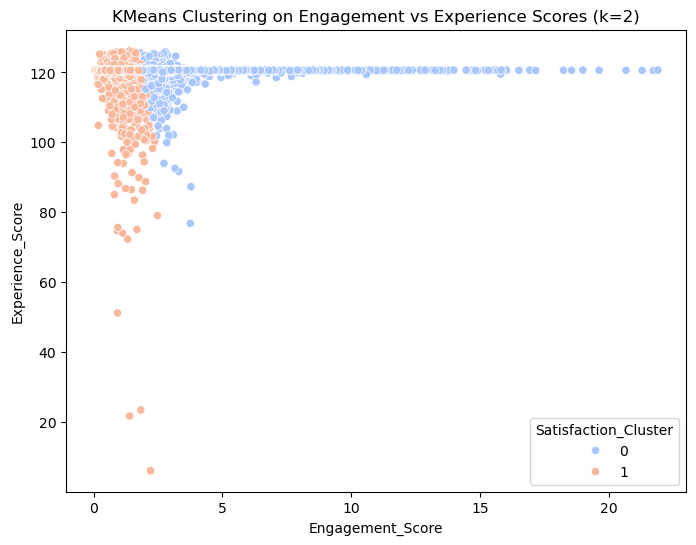

In [88]:
# KMeans clustering
from sklearn.cluster import KMeans

kmeans_satisfaction = KMeans(n_clusters=2, random_state=42)
df['Satisfaction_Cluster'] = kmeans_satisfaction.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='Engagement_Score', y='Experience_Score', hue='Satisfaction_Cluster', data=df, palette='coolwarm')
plt.title("KMeans Clustering on Engagement vs Experience Scores (k=2)")
plt.show()

In [89]:
cluster_summary = df.groupby('Satisfaction_Cluster')[['Satisfaction_Score','Experience_Score','Engagement_Score']].mean().reset_index()

print("Cluster Summary (Avg Scores):")
print(cluster_summary)

Cluster Summary (Avg Scores):
   Satisfaction_Cluster  Satisfaction_Score  Experience_Score  \
0                     0           61.544024        120.522614   
1                     1           60.841950        120.489024   

   Engagement_Score  
0          2.565435  
1          1.194875  


1. A regression model to predict satisfaction
2. A KMeans segmentation (k=2) on engagement & experience
3. A summary of average scores per cluster

In [91]:
!pip install mysql-connector-python sqlalchemy

In [92]:
import mysql.connector
from sqlalchemy import create_engine

print("MySQL connector & SQLAlchemy imported successfully!")

MySQL connector & SQLAlchemy imported successfully!


In [93]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [94]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [95]:
final_table = df[['IMSI', 'MSISDN/Number', 'Engagement_Cluster', 
                  'Experience_Cluster', 'Satisfaction_Cluster']].copy()

# Drop rows with missing values to avoid casting errors
final_table = final_table.dropna(subset=['Engagement_Cluster', 'Experience_Cluster', 'Satisfaction_Cluster'])

# Convert clusters to integer scores
final_table['Engagement_Score'] = final_table['Engagement_Cluster'].astype(int)
final_table['Experience_Score'] = final_table['Experience_Cluster'].astype(int)
final_table['Satisfaction_Score'] = final_table['Satisfaction_Cluster'].astype(int)

final_table.head()

IMSI  MSISDN/Number  Engagement_Cluster  Experience_Cluster  \
0  2.082014e+14   3.366496e+10                 0.0                   0   
1  2.082019e+14   3.368185e+10                 0.0                   0   
2  2.082003e+14   3.376063e+10                 0.0                   0   
3  2.082014e+14   3.375034e+10                 0.0                   0   
4  2.082014e+14   3.369980e+10                 0.0                   0   

   Satisfaction_Cluster  Engagement_Score  Experience_Score  \
0                     0                 0                 0   
1                     0                 0                 0   
2                     0                 0                 0   
3                     0                 0                 0   
4                     0                 0                 0   

   Satisfaction_Score  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Features: cluster scores
X = final_table[['Engagement_Score', 'Experience_Score']]
y = final_table['Satisfaction_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)

R2 Score: 0.0014498064850527737
MAE: 0.49166513140681395
MSE: 0.24558149962469114


In [97]:
import mlflow
import mlflow.sklearn
from datetime import datetime

# Start MLflow run
with mlflow.start_run(run_name="Satisfaction_Regression"):

    # Log code version & metadata
    mlflow.log_param("model_type", "LinearRegression")
    mlflow.log_param("n_clusters", 2)
    mlflow.log_param("train_size", len(X_train))
    mlflow.log_param("test_size", len(X_test))
    mlflow.log_param("run_time", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

    # Log model performance
    mlflow.log_metric("r2_score", r2)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("mse", mse)

    # Save model
    mlflow.sklearn.log_model(model, "satisfaction_regression_model")

    print("MLflow run logged successfully!")

2025/09/19 11:00:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/19 11:00:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run logged successfully!


In [174]:
!pip install pyodbc sqlalchemy pandas

In [178]:
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    f'SERVER={server};'
    f'DATABASE={database};'
    'Trusted_Connection=yes;'
)

In [182]:
tables = pd.read_sql("SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'", conn)
print(tables)

    TABLE_NAME
0  user_scores
1  sysdiagrams


In [184]:
query = "SELECT TOP 10 * FROM user_scores"
df = pd.read_sql(query, conn)
print(df.head())

Empty DataFrame
Columns: [MSISDN, Engagement_Score, Experience_Score, Satisfaction_Score]
Index: []


In [190]:
import pyodbc

conn = pyodbc.connect(
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=LAPTOP\\SQLEXPRESS;"
    "Database=telecom_db;"
    "Trusted_Connection=yes;"
)
cursor = conn.cursor()
print("✅ Connected successfully to SQL Server!")

✅ Connected successfully to SQL Server!


In [196]:
print(df.columns.tolist())

['MSISDN', 'Engagement_Score', 'Experience_Score', 'Satisfaction_Score']


In [198]:
final_scores_df = df.rename(columns={
    "MSISDN": "user_id",
    "Engagement_Score": "engagement_score",
    "Experience_Score": "experience_score",
    "Satisfaction_Score": "satisfaction_score"
})

final_scores_df.head()

Empty DataFrame
Columns: [user_id, engagement_score, experience_score, satisfaction_score]
Index: []

In [200]:
for index, row in final_scores_df.iterrows():
    cursor.execute("""
        INSERT INTO user_scores (user_id, engagement_score, experience_score, satisfaction_score)
        VALUES (?, ?, ?, ?)
    """, row['user_id'], row['engagement_score'], row['experience_score'], row['satisfaction_score'])

conn.commit()
print("✅ Data inserted into SQL successfully!")

✅ Data inserted into SQL successfully!


In [202]:
query = "SELECT TOP 10 * FROM user_scores"
check_df = pd.read_sql(query, conn)
print(check_df)

Empty DataFrame
Columns: [MSISDN, Engagement_Score, Experience_Score, Satisfaction_Score]
Index: []


In [204]:
print(final_scores_df.shape)
print(final_scores_df.head())

(0, 4)
Empty DataFrame
Columns: [user_id, engagement_score, experience_score, satisfaction_score]
Index: []


In [206]:
for index, row in final_scores_df.iterrows():
    cursor.execute("""
        INSERT INTO user_scores (MSISDN, Engagement_Score, Experience_Score, Satisfaction_Score)
        VALUES (?, ?, ?, ?)
    """, row['MSISDN'], row['Engagement_Score'], row['Experience_Score'], row['Satisfaction_Score'])

conn.commit()

In [210]:
query = "SELECT COUNT(*) as total_rows FROM user_scores"
count_df = pd.read_sql(query, conn)
print(count_df)

   total_rows
0           0
